# Projekt - Data Engineering

**Forschungsfrage:** <br>
Wie beeinflussen demografische Faktoren wie Geschlecht und Altersgruppe
die Wahl der Berufskategorie in Schulungsmaßnahmen im Auftrag des AMS und wie hat sich
die Verteilung der Schulungsteilnehmer in unterschiedlichen Berufskategorien und Arbeitsmarktbezirken über den Zeitraum von 2019 bis 2023 entwickelt?<br>

Bitte über folgenden Link die für dieses Projekt verwendeten Datensatz herunterladen und in den Projektordner \datasets hinzufügen:<br>
1. Datensatz: <a href= "https://drive.google.com/file/d/1aendvOmZOsJRYnZ31xWDWX29VR_U-TpE/view">Link zum Datensatz</a>


## Kapitel 1: Informationen zum Datensatz

Für das Projekt werden drei Datensätze kombiniert: <a href= "https://www.data.gv.at/katalog/dataset/CFE2FF7E9AD53C1EE053C630070AB113#resources">Personen in Schulung nach Alter und Berufswunsch - Bestand</a>, <a href= "https://www.data.gv.at/katalog/dataset/stat_gliederung-osterreichs-in-arbeitsmarktbezirkebe7d8">Gliederung Österreichs in Arbeitsmarktbezirke</a> und <a href= "https://docs.google.com/spreadsheets/d/1icGePLaFoBUc1MW6LkxV2Ggc3KMx9rYr/edit#gid=1170139437">23-682_Auszug_AMS-Berufssystematik</a>. Letzterer stammt direkt Dienstelle für Statistik des AMS und ist nicht online verfügbar. Der Datensatz bildet den Bestand an Schulungsteilnehmer*innen über einen Zeitraum vom 31.01.2019 bis zum 30.09.2023 ab. Er ordnet den Bestand verschiedenen Berufen, Berufskategorien und Arbeitsmarktbezirken zu. Arbeitsmarktbezirke werden durch die Betriebstellen des AMS definiert. Zudem wurden die Geodaten der Arbeitsmarktbezirke in einem separaten Datensatz bereitgestellt. Der primäre Datensatz
wurde am 21. Oktober 2023 heruntergeladen und die letzten Änderungen daran wurden am 2. Oktober 2023 vorgenommen. Zukünftige Updates dieses Datensatzes sind in der Analyse nicht
berücksichtigt.

#### Definition Schulungsteilnehmer [Quelle](quellen\BRL_Statusmeldung.pdf)
Status »SC« - TeilnehmerInnen an Schulungsmaßnahmen im Auftrag des AMS<br>
Unter  diesem  Status  sind  alle  ansonst  arbeitslosen,  arbeitsuchenden  bzw.  lehrstellensuchenden  
Personen  vorzumerken,  die  zur  besseren  Erfüllbarkeit  des  (Arbeits-  oder  Lehrstellenvermittlungs-)  
Auftrages in Abstimmung mit dem AMS werktags und während des Tages eine Schulung besuchen, 
sofern diese mindestens 10 Maßnahmenstunden pro Woche hat; d.h. der Status „SC“ darf nicht bei 
Kursen, die ausschließlich  am Abend (ab  16:00  Uhr)  oder  am  Wochenende (ab  Freitag, 13:00  Uhr)  
besucht  werden, Anwendung finden, oder  wenn  eine Ausnahmegenehmigung  gemäß  § 12 (4) AlVG 
vorliegt.<br>   
Schulungen im Auftrag des AMS  (egal ob  fremd-  oder  eigenfinanziert), die  diesen  Status  bedingen,  
sind:<br>
- Maßnahmen der Aus- und Weiterbildung  
- Vorbereitungsphase und Realisierungsphase im Rahmen des Unternehmensgründungspro-
gramms (UGP) 
- Arbeitsstiftungen 
- Maßnahmen zur aktiven Arbeitssuche 
- Berufsorientierung 
- Maßnahmen des JASG (Jugendausbildungs-Sicherungsgesetz)  
- Arbeitstraining 
- Arbeitserprobung 
- Vorbereitungsmaßnahmen im Rahmen des SÖB bzw. GBP 

## Kapitel 2: Projekt-Setup

Für die Ausführung des folgenden Jupyter Notebooks werden die folgenden Pakaete/Module/Bibliotheken:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import plotly.express as px
import seaborn as sns
import geopandas as gpd
from scipy.stats import chi2_contingency
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
print("Imports waren erfolgreich.")

Imports waren erfolgreich.


## Kapitel 4: Besorgen und Bereinigen der Daten (E2)
In diesem Kapitel geht es darum das Dataset, das für dieses Projekt gewählt wurde in dieses Notebook zu laden und für das Kapitel 3 vorzubereiten.

### 4.1 Laden des Datensatzes

In [2]:
# 1. Schritt: Daten laden, ersten 5 Zeilen visualisieren.


# Bitte den folgenden Datensatz aus dieser Quelle herunterladen und in den Ordner src/datasets des Projekts ablegen.

# Quelle: https://drive.google.com/drive/folders/172Yr54QRmctk1HfDT2tIC1qwgn-8GJWW?usp=drive_link

df = pd.read_csv("datasets/Bestand_SC_Alter_Berufswunsch_RGS.csv", encoding='ISO-8859-1', delimiter=";")
df.head()

,Datum,RGSCode,RGSName,Geschlecht,Altersgruppe,Berufs4Steller,Berufs4StellerBez,BESTAND,Unnamed: 8
0,2019-01-31,101,Eisenstadt,Frauen,bis 19 Jahre,B0254,"Tierzuchtgehilf(en)innen, Tierpfleger/innen",1,NaN
1,2019-01-31,101,Eisenstadt,Frauen,bis 19 Jahre,B1761,"Maler/innen, Anstreicher/innen",1,NaN
2,2019-01-31,101,Eisenstadt,Frauen,bis 19 Jahre,B2105,"Karosserie-, Kühlerspengler/innen",1,NaN
3,2019-01-31,101,Eisenstadt,Frauen,bis 19 Jahre,B2405,Elektromechaniker/innen,1,NaN
4,2019-01-31,101,Eisenstadt,Frauen,bis 19 Jahre,B3631,Bäcker/innen,1,NaN


Da durch den gwählten demeliter=";" beim auslesen des Dataframes, und der tatsache, dass in der CSV jede Zeile mit einem ";" endet wurde eine neue Spalte im Dataframe hinzugefügt (Unnamed: 8), die jedoch nicht benötigt wird. Daher wird diese im folgenden entfenrt.

In [3]:
# 2. Schritt: Drop der Spalte Unnamed: 8
df.drop("Unnamed: 8", axis=1, inplace=True) 
df.columns

Index(['Datum', 'RGSCode', 'RGSName', 'Geschlecht', 'Altersgruppe',
       'Berufs4Steller', 'Berufs4StellerBez', 'BESTAND'],
      dtype='object')

Aus gründen der Leserlichkeit wurde sich dazu entschieden folgende Attribute (Spaltenköpfe) anzupassen:
<ol>
<li><b>RGSCode:</b> = Bezirkscode</li>
<li><b>RGSName:</b> Arbeitsmarktbezirk</li>
<li><b>Berufs4Steller:</b> = BerufsCode</li>
<li><b>Berufs4StellerBez:</b> = BerufsBez </li>
<li><b>BESTAND:</b> = Bestand</li>
</ol>

In [4]:
# 3. Schritt: Umbennung der Spalten
df = df.rename(columns={
    'RGSCode': 'Bezirkscode',
    'RGSName':'Arbeitsmarktbezirk',
    'Berufs4Steller': 'BerufsCode',
    'Berufs4StellerBez': 'BerufsBez',
    'BESTAND': 'Bestand'
})
df.columns

Index(['Datum', 'Bezirkscode', 'Arbeitsmarktbezirk', 'Geschlecht',
       'Altersgruppe', 'BerufsCode', 'BerufsBez', 'Bestand'],
      dtype='object')

### 4.2 Datenbereinigung / Datenaufbereitung
In diesem Absatz wird der Datensatz bereinigt um im folgenden eine Analyse des Datensatzes durchführen zu können.
Hierfür wurden die folgenden Schritte durchgeführt:

In [5]:
# 1. Schritt: Überprufung der unterschiedlichen dtypes im Dataframe
print("Alles Datentypen der Einzelnen Spalten:")
df.info()

Alles Datentypen der Einzelnen Spalten:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591515 entries, 0 to 1591514
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Datum               1591515 non-null  object
 1   Bezirkscode         1591515 non-null  int64 
 2   Arbeitsmarktbezirk  1591515 non-null  object
 3   Geschlecht          1591515 non-null  object
 4   Altersgruppe        1591515 non-null  object
 5   BerufsCode          1591515 non-null  object
 6   BerufsBez           1591009 non-null  object
 7   Bestand             1591515 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 97.1+ MB


In [6]:
# 2. Schritt: Generelle Informationen über den Datensatz ausleisen 
df.describe()

,Bezirkscode,Bestand
count,1.591515e+06,1.591515e+06
mean,6.031184e+02,2.345250e+00
std,2.830362e+02,7.611981e+00
min,1.010000e+02,1.000000e+00
25%,3.330000e+02,1.000000e+00
50%,6.090000e+02,1.000000e+00
75%,9.600000e+02,2.000000e+00
max,9.770000e+02,7.590000e+02


In [7]:
print('Summiert der gesamte Bestand für den Zeitraum vom 31.01.2019 bis zum 30.09.2023 in einer Schulung befunden haben', df["Bestand"].sum())

Summiert der gesamte Bestand für den Zeitraum vom 31.01.2019 bis zum 30.09.2023 in einer Schulung befunden haben 3732501


In [8]:
# Schritt 5: Entfernen aller Duplicate der Daten 
length_df = len(df)
df = df.drop_duplicates()
print("Die Anzahl an entfernten Dopplungen des Datensatzes beträgt",length_df - len(df))

Die Anzahl an entfernten Dopplungen des Datensatzes beträgt 0


In [9]:
df.nunique()

Datum                  57
Bezirkscode           104
Arbeitsmarktbezirk    104
Geschlecht              2
Altersgruppe           11
BerufsCode            458
BerufsBez             457
Bestand               435
dtype: int64

In [10]:
# Schritt 6: Überprüfung von der fehlenden Werte im Dataframe
print("Aufsummiert die Anzahl von fehlenden Einträgen der Objekte / Zeilen des Datensatzes, pro Spalte:\n")
print(df.isnull().sum())

Aufsummiert die Anzahl von fehlenden Einträgen der Objekte / Zeilen des Datensatzes, pro Spalte:

Datum                   0
Bezirkscode             0
Arbeitsmarktbezirk      0
Geschlecht              0
Altersgruppe            0
BerufsCode              0
BerufsBez             506
Bestand                 0
dtype: int64


In [11]:
# Anzahl aller Objekte / Zeilen) des Datensatzes
print("Die Anzahl aller Objekte / Zeilen des Datensatzes ist: ",len(df))

Die Anzahl aller Objekte / Zeilen des Datensatzes ist:  1591515


Zu sehen ist, dass 506 Objekt / Zeilen des Datensatzes in der Spalte Berufsbezeichnung fehlende Werte haben. Der Datesatz bildet insgesmat 1591515 Objekte / Zeilen ab. Das Subset der Daten ohne Berufbezeichnet gerade ein Mal gerundet: 0,03 %

#### 4.2.2 Bearbeiten der Spalten
In diesem Absatz werden die einzelnen Spalten des Datensatzes in angepasst, um im folgenden eine Analyse des Datensatzes durchführen zu können.
Hierfür wurden die folgenden Schritte durchgeführt:

In [12]:
# Schritt 1: Verteilung des Bestands über die unterschiedlichen Altersgruppen
result = df.groupby('Altersgruppe')['Bestand'].sum()
result

Altersgruppe
20 bis 24 Jahre       717354
25 bis 29 Jahre       445831
30 bis 34 Jahre       430740
35 bis 39 Jahre       403591
40 bis 44 Jahre       333959
45 bis 49 Jahre       274784
50 bis 54 Jahre       216071
55 bis 59 Jahre       135481
60 bis 64 Jahre        24306
65 Jahre und älter       398
bis 19 Jahre          749986
Name: Bestand, dtype: int64

Wir werden eine neue Spalte mit dem Namen 'ObereAltersGrenze' erstellen. In dieser Spalte wird die obere Grenze der jeweiligen Altersgruppe als numerischer Wert dargestellt. Zum Beispiel wird der Altersgruppe "bis 19 Jahre" der Wert 20 zugewiesen, da die nächsthöhere Altersgruppe "20 bis 24 Jahre" ist. Entsprechend erhält die Altersgruppe "20 bis 24 Jahre" den Wert 25, da die darauf folgende Gruppe "25 bis 29 Jahre" ist, und so weiter.

In [13]:
# Schritt 3: Extrahiere die Zahlen aus der Altersgruppe und berechne 'MaximalAlter'
def calculate_max_age(age_group):
    numbers = [int(s) for s in age_group.split() if s.isdigit()]
    if not numbers:
        return 20  # Für 'bis 19 Jahre'
    return max(numbers) + 1

df['ObereAltersGrenze'] = df['Altersgruppe'].apply(calculate_max_age)

# Prüfe das Ergebnis
result = df['ObereAltersGrenze'].value_counts()
print(result)

ObereAltersGrenze
25    232868
30    209647
35    203659
40    196956
20    177984
45    173511
50    153605
55    131522
60     91667
65     19700
66       396
Name: count, dtype: int64


In [14]:
# Schritt 4: Umsortieren der Spalten:
columns_reordered = ["Datum","Bezirkscode","Arbeitsmarktbezirk","Geschlecht","Altersgruppe",'ObereAltersGrenze','BerufsCode','BerufsBez','Bestand']
# DataFrame umsortieren
df = df.reindex(columns=columns_reordered)
df.head(2)

,Datum,Bezirkscode,Arbeitsmarktbezirk,Geschlecht,Altersgruppe,ObereAltersGrenze,BerufsCode,BerufsBez,Bestand
0,2019-01-31,101,Eisenstadt,Frauen,bis 19 Jahre,20,B0254,"Tierzuchtgehilf(en)innen, Tierpfleger/innen",1
1,2019-01-31,101,Eisenstadt,Frauen,bis 19 Jahre,20,B1761,"Maler/innen, Anstreicher/innen",1


Nun haben wir neben der Spalte der Altersgruppe die Spalte der Oberen AltersGrenze.

In [15]:
# Schritt 6: Entfenren des Bs bei Berufscode. Dieser Schritt ist notwendig um den Datensatz später erweitern zu können.
#df['BerufsCode'] = df['BerufsCode'].str.replace('B', '', 1).astype(int)
df['BerufsCode'] = df['BerufsCode'].str.replace('B', '', 1).replace('', '0').astype(int)

df.head(2)

,Datum,Bezirkscode,Arbeitsmarktbezirk,Geschlecht,Altersgruppe,ObereAltersGrenze,BerufsCode,BerufsBez,Bestand
0,2019-01-31,101,Eisenstadt,Frauen,bis 19 Jahre,20,254,"Tierzuchtgehilf(en)innen, Tierpfleger/innen",1
1,2019-01-31,101,Eisenstadt,Frauen,bis 19 Jahre,20,1761,"Maler/innen, Anstreicher/innen",1


In [16]:
# Schritt 7: Setzen umwandeln von Datum von String zu Datetime
df['Datum'] = pd.to_datetime(df['Datum'], format='%Y-%m-%d')
df.dtypes

Datum                 datetime64[ns]
Bezirkscode                    int64
Arbeitsmarktbezirk            object
Geschlecht                    object
Altersgruppe                  object
ObereAltersGrenze              int64
BerufsCode                     int32
BerufsBez                     object
Bestand                        int64
dtype: object

#### 4.2.3 Visualisieren der Daten
In diesem Absatz wurde versucht über verschiedene Plots ein Verständnis über die Daten zu bekommen.

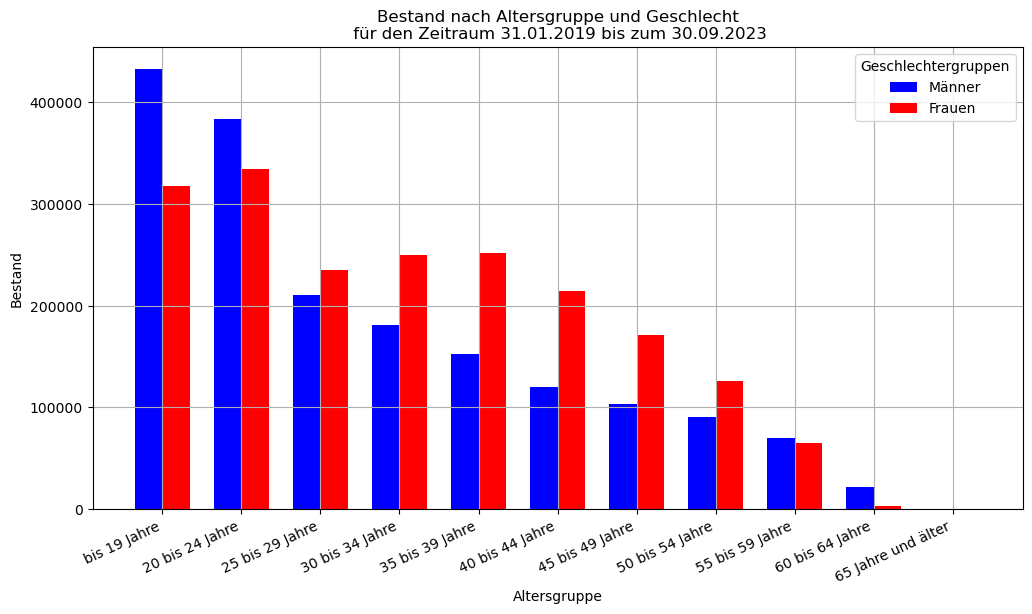

In [17]:
# Schritt 1: Plotten eines Histogramms
grouped_df_hist = df.groupby(['Altersgruppe', 'ObereAltersGrenze', 'Geschlecht']).agg({'Bestand': 'sum'}).reset_index()
grouped_df_hist.sort_values(by='ObereAltersGrenze', inplace=True)


# Eindeutige Altersgruppen und Geschlechter
age_groups = grouped_df_hist['Altersgruppe'].unique()
genders = grouped_df_hist['Geschlecht'].unique()

# Bar-Breite
bar_width = 0.35

# X-Koordinaten der Bars
x = np.arange(len(age_groups))
 

# Erstellen des Plots
fig, ax = plt.subplots(figsize=(12, 6))

# Hinzufügen der Bars
for i, gender in enumerate(genders):
    gender_data = grouped_df_hist[grouped_df_hist['Geschlecht'] == gender]
    ax.bar(x + i * bar_width, gender_data['Bestand'], bar_width, label=gender, color=('blue' if gender == 'Männer' else 'red'))

# Benennung der X-Ticks
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(age_groups, rotation=25, ha='right')  # Verwenden Sie age_groups direkt

# Hinzufügen von Legende und Labels
ax.legend(title='Geschlechtergruppen')  # Legende hinzufügen
ax.set_xlabel('Altersgruppe')
ax.set_ylabel('Bestand')
ax.set_title('Bestand nach Altersgruppe und Geschlecht\n für den Zeitraum 31.01.2019 bis zum 30.09.2023')
ax.grid(True)
# Anzeigen des Plots
plt.show()

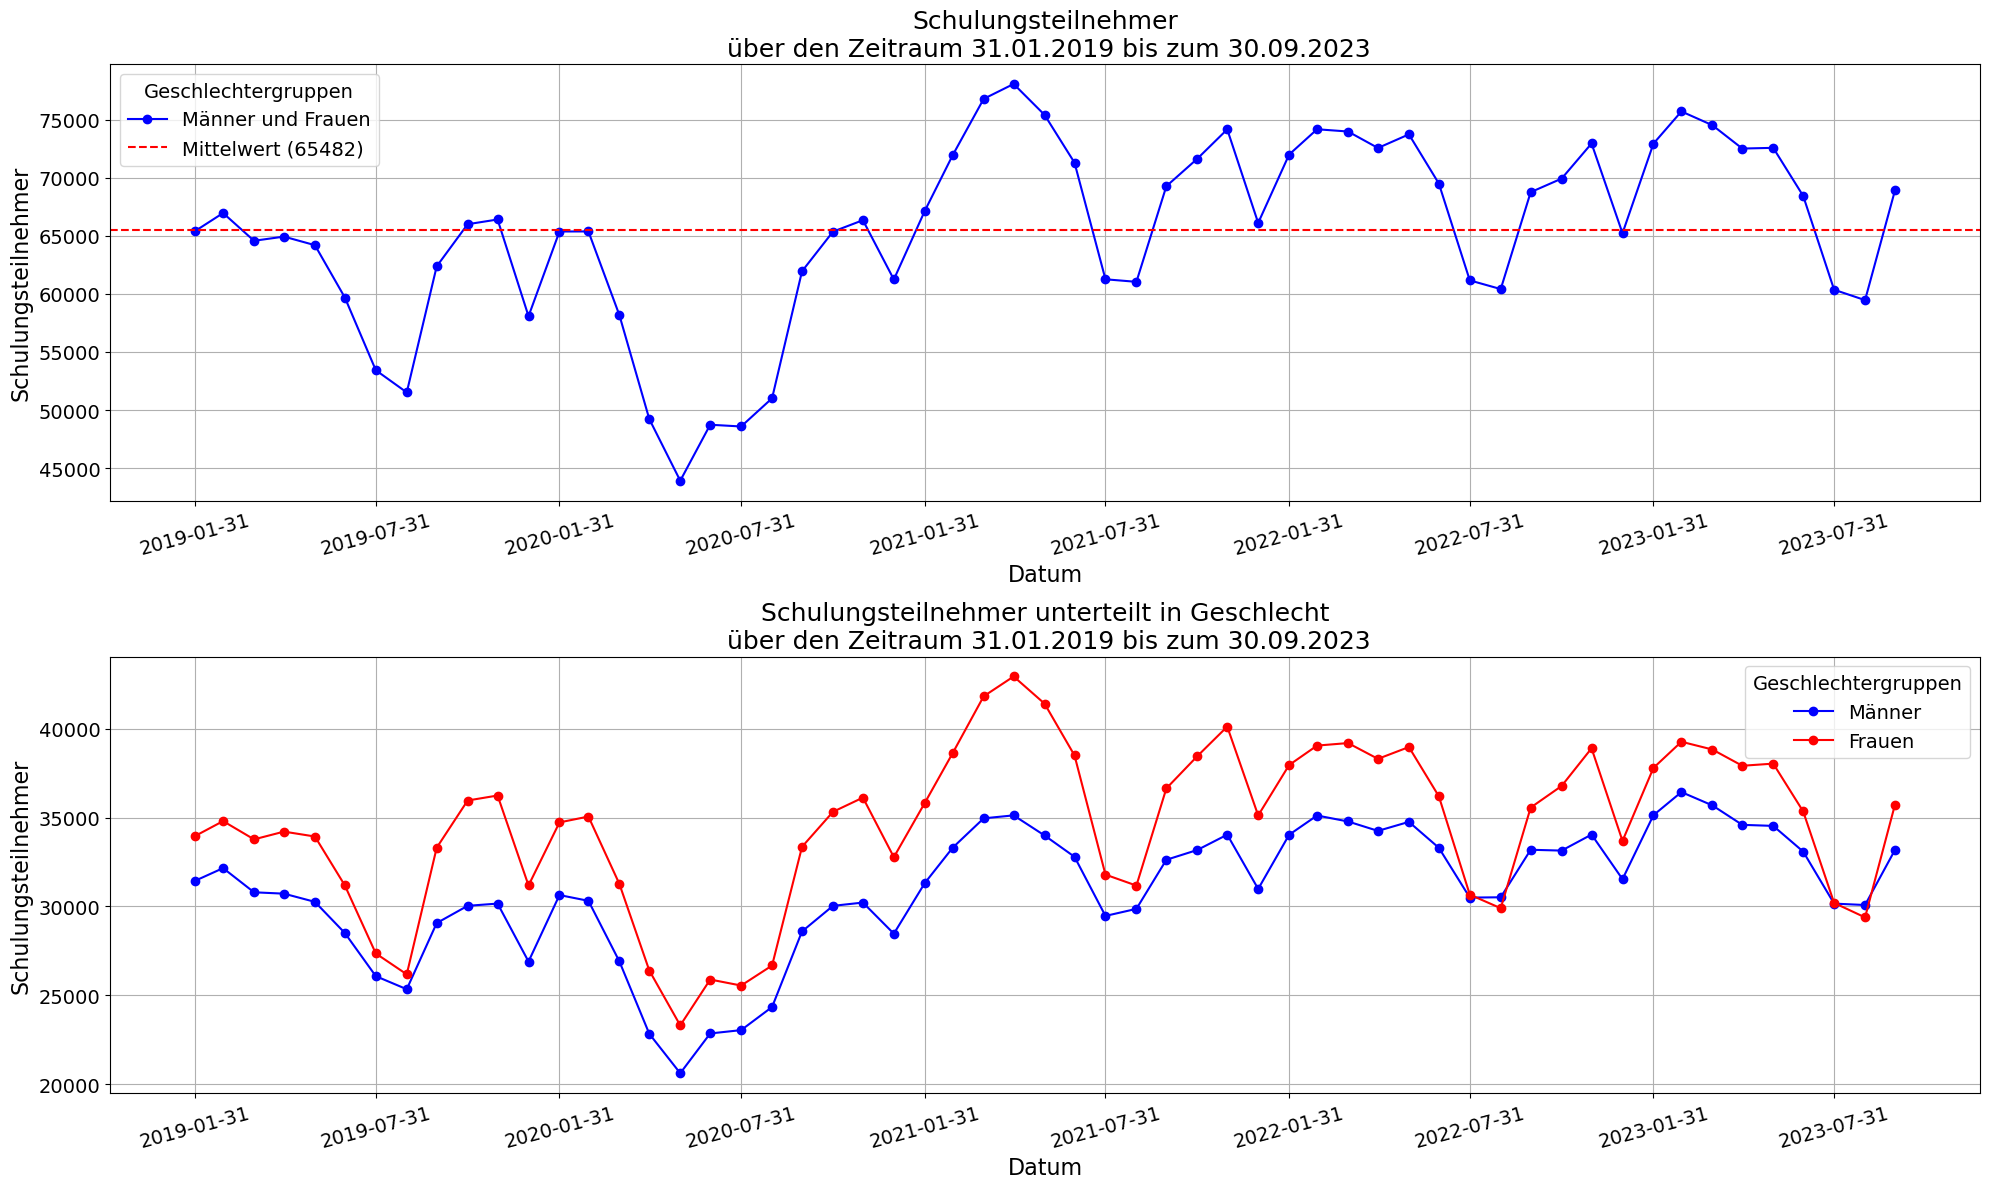

In [18]:
# Schritt 2: Plotten des gesamten Bestands von Männern und Frauen über den Zeitraum

# Daten vorbereiten
pivot_df_plot_line = df.pivot_table(index='Datum', columns='Geschlecht', values='Bestand', aggfunc='sum')
pivot_df_plot_total = df.groupby("Datum")["Bestand"].sum()

# Subplots erstellen
fig, ax = plt.subplots(2, 1, figsize=(20, 12))

# Parameter für die Textgrößen festlegen
title_fontsize = 18
axis_label_fontsize = 16
tick_fontsize = 14
legend_fontsize = 14

# Erster Plot (Gesamtbestand + Mittelwert)
ax[0].plot(pivot_df_plot_total.index, pivot_df_plot_total, marker='o', linestyle='-', color='b', label='Männer und Frauen')
ax[0].set_title('Schulungsteilnehmer\n über den Zeitraum 31.01.2019 bis zum 30.09.2023', fontsize=title_fontsize)
ax[0].set_xlabel('Datum', fontsize=axis_label_fontsize)
ax[0].set_ylabel('Schulungsteilnehmer', fontsize=axis_label_fontsize)
ax[0].grid(True)
mean_value = pivot_df_plot_total.mean()
ax[0].axhline(y=mean_value, color='r', linestyle='--', label=f'Mittelwert ({mean_value:.0f})')
ax[0].legend(title='Geschlechtergruppen', fontsize=legend_fontsize, title_fontsize=legend_fontsize)
x_ticks_2 = pivot_df_plot_total.index[::6]
ax[0].set_xticks(x_ticks_2)
ax[0].tick_params(axis='x', rotation=15, labelsize=tick_fontsize)
ax[0].tick_params(axis='y', labelsize=tick_fontsize)

# Zweiter Plot (Männer vs. Frauen)
ax[1].plot(pivot_df_plot_line.index, pivot_df_plot_line['Männer'], marker='o', linestyle='-', color='b', label='Männer')
ax[1].plot(pivot_df_plot_line.index, pivot_df_plot_line['Frauen'], marker='o', linestyle='-', color='r', label='Frauen')
ax[1].set_title('Schulungsteilnehmer unterteilt in Geschlecht\n über den Zeitraum 31.01.2019 bis zum 30.09.2023', fontsize=title_fontsize)
ax[1].set_xlabel('Datum', fontsize=axis_label_fontsize)
ax[1].set_ylabel('Schulungsteilnehmer', fontsize=axis_label_fontsize)
ax[1].grid(True)
ax[1].legend(title='Geschlechtergruppen', fontsize=legend_fontsize, title_fontsize=legend_fontsize)
x_ticks_1 = pivot_df_plot_line.index[::6]
ax[1].set_xticks(x_ticks_1)
ax[1].tick_params(axis='x', rotation=15, labelsize=tick_fontsize)
ax[1].tick_params(axis='y', labelsize=tick_fontsize)

# Anzeige der Subplots
plt.tight_layout()
plt.show()


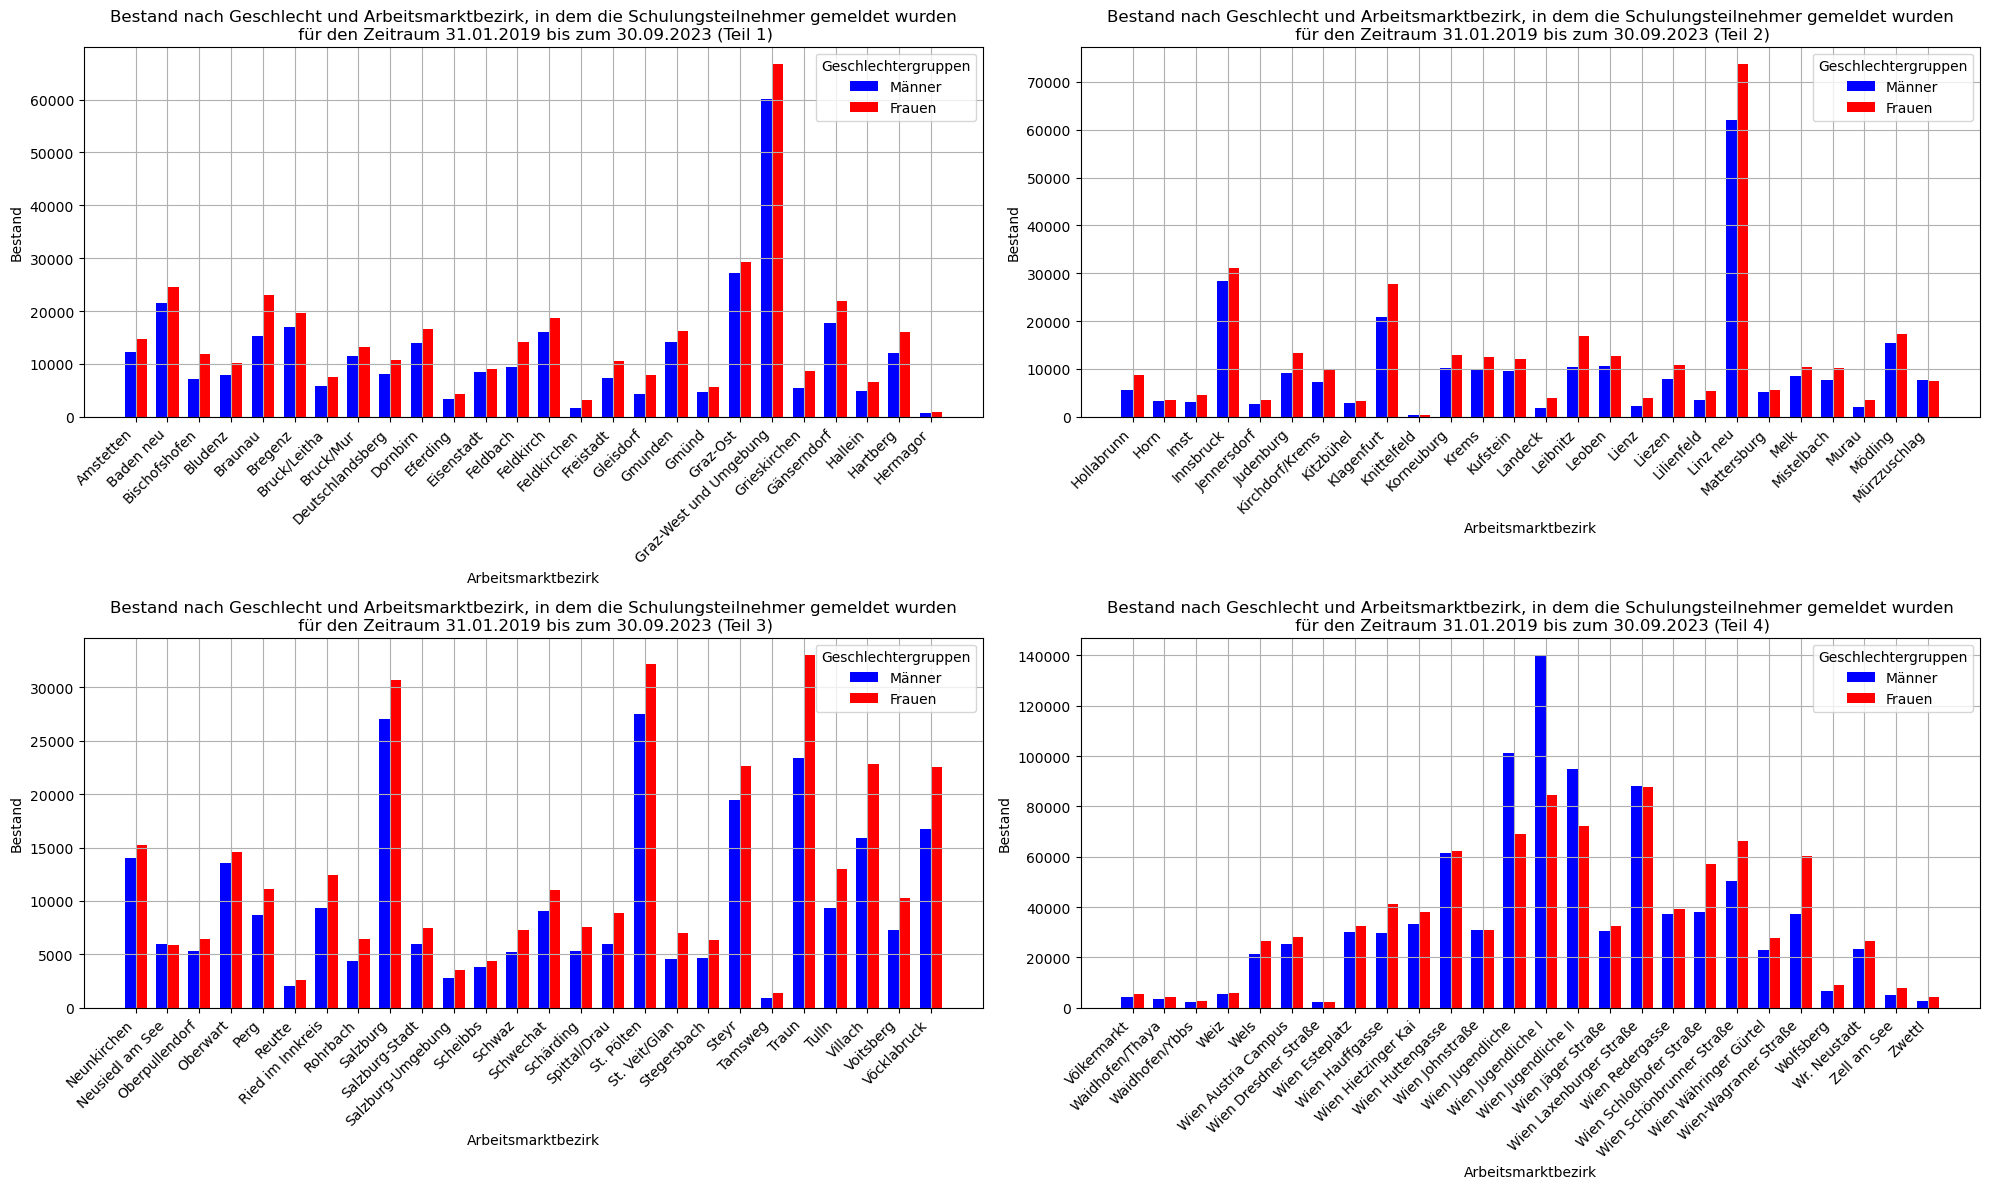

In [19]:
# Schritt 3: Histogramm der Arbeitsbezirke
# Erstellung der Pivot-Tabelle
pivot_df_plot_line = df.pivot_table(index='Arbeitsmarktbezirk', columns='Geschlecht', values='Bestand', aggfunc='sum')

# Bar-Breite
bar_width = 0.35

# Aufteilen der Daten in vier gleiche Teile
num_splits = 4
split_indices = np.linspace(0, len(pivot_df_plot_line), num_splits + 1, dtype=int)
quarters = [pivot_df_plot_line.iloc[split_indices[i]:split_indices[i + 1]] for i in range(num_splits)]

# Erstellen des Plots mit angegebener Figure-Größe
fig, axs = plt.subplots(2, 2, figsize=(20, 12))  # 2x2 Grid für die vier Subplots

# Durchlaufen der vier Teile und Erstellen eines Subplots für jeden Teil
for i, quarter in enumerate(quarters):
    ax = axs[i//2, i%2]  # Zugriff auf den entsprechenden Subplot in der 2x2 Grid
    
    # X-Koordinaten der Bars
    x = np.arange(len(quarter.index))
    
    # Hinzufügen der Bars für Männer und Frauen
    ax.bar(x - bar_width/2, quarter['Männer'], bar_width, label='Männer', color='blue')
    ax.bar(x + bar_width/2, quarter['Frauen'], bar_width, label='Frauen', color='red')
    
    # Benennung der X-Ticks
    ax.set_xticks(x)
    ax.set_xticklabels(quarter.index, rotation=45, ha='right')
    
    # Hinzufügen von Legende und Labels
    ax.legend(title='Geschlechtergruppen')
    ax.set_xlabel('Arbeitsmarktbezirk')
    ax.set_ylabel('Bestand')
    ax.set_title(f'Bestand nach Geschlecht und Arbeitsmarktbezirk, in dem die Schulungsteilnehmer gemeldet wurden\n für den Zeitraum 31.01.2019 bis zum 30.09.2023 (Teil {i+1})')
    ax.grid(True)

# Anpassen des Layouts, um Überlappungen zu vermeiden
plt.tight_layout()

# Anzeigen des Plots
plt.show()


In [20]:
# Schritt 9: Überrpüfung der beliebtesten Berufe:
# Überprüfen ob der df Grupiert nach Berufscodes genauso lang ist wie der df gruppiert nach Berufsbezeichnung. Um zu schauen dass nicht unterschiedliche Bezeichnungen für die gleichen Berufscodes genommen wurden
# Wenn beide gleich lang sind können wir mit den Berufsbezeichnungen weiterarbeiten
bestand_sum_berufscode= df.groupby('BerufsCode')['Bestand'].sum()
bestand_sum_berufbez = df.groupby('BerufsBez')['Bestand'].sum()
if len(bestand_sum_berufscode) == len(bestand_sum_berufbez):
    print("Summierter Bestand an Schulungsteilnehmer absteigend aufgelistete nach Beruf vom\nfür den Zeitraum 31.01.2019 bis zum 30.09.2023.\n")
    print(bestand_sum_berufbez.sort_values(ascending=False))

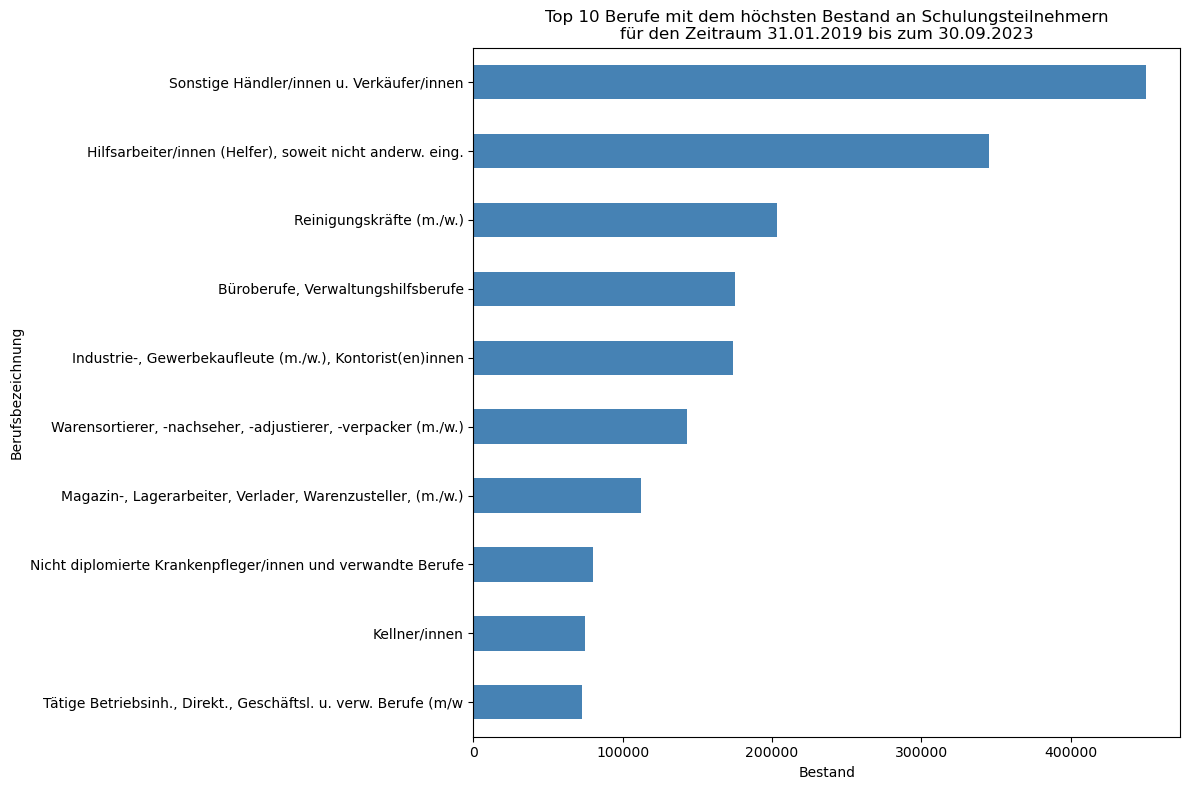

In [21]:
# Bestand nach Berufsbezeichnung sortieren
top_berufe = bestand_sum_berufbez.sort_values(ascending=False).head(10)  # Top 10 Berufe

# Plot erstellen
plt.figure(figsize=(12, 8))
top_berufe.plot(kind='barh', color='steelblue')
plt.xlabel('Bestand')
plt.ylabel('Berufsbezeichnung')
plt.title('Top 10 Berufe mit dem höchsten Bestand an Schulungsteilnehmern\nfür den Zeitraum 31.01.2019 bis zum 30.09.2023')
plt.gca().invert_yaxis()  # Sortiere die Berufe absteigend
plt.tight_layout()
plt.show()

## Kapitel 5: Erweitern des Datensatzes.
In diesem Kapitel wird der bereitgstellte Datensatz um weitere Datensätze des AMS erweitert um eine bessere Grundlage für spätere Hypothesen zu haben.


### 5.1: Ergänzen von Berufskategorien nach AMS Berufssystematik
Da der bisherige Datensatz 457 Berufe betrachtet nach AMS 4 Steller Berufcodierung, man jedoch diese Berufe nicht in Berufsfelder einornen kann, wurde sich dazu entschieden mit Hilfe eines weiteren Datensatzes, der nach einem Mail-Verkehr mit der AMS Betriebstelle bereitgestellt wurde.

In [22]:
# Schritt 1: Laden des Datensatzes mit den Berufskategorien
df_berufs_category = pd.read_excel("datasets/23-682_Auszug_AMS-Berufssystematik.xlsx", engine='openpyxl')
df_berufs_category.head()

,BSKZ,Bezeichnung,EBENE,4-Steller,4-Steller-Bezeichnung,2-Steller,2-Steller-Bezeichnung,1-Steller,1-Steller-Bezeichnung
0,0,Land- und forstwirtschaftliche Berufe,1-Steller,NaN,NaN,NaN,NaN,NaN,NaN
1,01,"Techniker/innen für Landwirtschaft, landwirtsc...",2-Steller,NaN,NaN,NaN,NaN,0.0,Land- und forstwirtschaftliche Berufe
2,0101,"DI (m./w.) für Landwirtschaft, Wein- und Garte...",4-Steller,NaN,NaN,1.0,"Techniker/innen für Landwirtschaft, landwirtsc...",0.0,Land- und forstwirtschaftliche Berufe
3,010101,Agrarberater/in (DI),6-Steller,101.0,"DI (m./w.) für Landwirtschaft, Wein- und Garte...",1.0,"Techniker/innen für Landwirtschaft, landwirtsc...",0.0,Land- und forstwirtschaftliche Berufe
4,010102,Landwirtschaftstechniker/in (DI),6-Steller,101.0,"DI (m./w.) für Landwirtschaft, Wein- und Garte...",1.0,"Techniker/innen für Landwirtschaft, landwirtsc...",0.0,Land- und forstwirtschaftliche Berufe


In [23]:
# Schritt 2: Grobes Verständnis für die Werteverteilung
df_berufs_category["EBENE"].value_counts()

EBENE
6-Steller    4324
4-Steller     499
2-Steller      77
1-Steller      10
Name: count, dtype: int64

Der  Datensatz ist wie Folgt aufgebaut:
Die Tabelle bietet eine hierarchische Einteilung von Berufen in Bereich (z.B. "Land- und forstwirtschaftliche Berufe") anhand eines sogenannten "Berufsteller Codes". Diese Hierarchie hat mehrere Ebenen, wobei die Berufe auf der detailliertesten Ebene durch einen 6-stelligen Code repräsentiert werden. Die Ebenen lauten:

1. **1-Steller**: Dies ist die höchste Ebene, die den allgemeinsten Berufsbereich angibt, in diesem Fall "Land- und forstwirtschaftliche Berufe".

2. **2-Steller**: Unter der 1-Steller-Ebene gibt es eine genauere Unterteilung in spezifische Berufskategorien. Zum Beispiel "Techniker/innen für Landwirtschaft, landwirtschaftliche Förderungsbeamt(e)innen" mit dem Code "01".

3. **4-Steller**: Unter der 2-Steller-Ebene gibt es eine weitere Unterteilung. Hier sind die Berufe noch genauer spezifiziert, z.B. "DI (m./w.) für Landwirtschaft, Wein- und Gartenbau" mit dem Code "0101". (Ebene in dem der Datensatz arbeitet)

4. **6-Steller**: Dies ist die detaillierteste Ebene, auf der spezifische Berufe aufgelistet sind. Jeder dieser Berufe ist einem 4-Steller- und einem 2-Steller-Code zugeordnet, was zeigt, zu welchen übergeordneten Kategorien sie gehören. Zum Beispiel gehört der Beruf "Agrarberater/in (DI)" mit dem Code "010101" zur 4-Steller-Kategorie "DI (m./w.) für Landwirtschaft, Wein- und Gartenbau" und zur 2-Steller-Kategorie "Techniker/innen für Landwirtschaft, landwirtschaftliche Förderungsbeamt(e)innen".

Insgesamt dient diese Tabelle als hierarchisches Klassifikationssystem für Berufe in Bereiche. Ein Benutzer könnte den Berufsteller Code verwenden, um schnell und effizient die spezifische und allgemeine Kategorie eines bestimmten Berufs zu bestimmen.

Da im davor behandelt Dataframe nur bis auf die ebene 4-Steller differnziert wurde wird im folgenden der geladenen Df auf nur diese Ebene gekürz.
Wir können den Bestand nicht auf 6-Steller-Ebene betrachten

In [24]:
# Schritt 1: Kürzen des Datensatzes auf nur noch 4-Steller-Bezeichnungen
df_berufs_category = df_berufs_category[df_berufs_category['EBENE'] == '4-Steller']
df_berufs_category.head()

,BSKZ,Bezeichnung,EBENE,4-Steller,4-Steller-Bezeichnung,2-Steller,2-Steller-Bezeichnung,1-Steller,1-Steller-Bezeichnung
2,0101,"DI (m./w.) für Landwirtschaft, Wein- und Garte...",4-Steller,NaN,NaN,1.0,"Techniker/innen für Landwirtschaft, landwirtsc...",0.0,Land- und forstwirtschaftliche Berufe
13,0105,Techniker/innen mit höherer Ausbildung für Lan...,4-Steller,NaN,NaN,1.0,"Techniker/innen für Landwirtschaft, landwirtsc...",0.0,Land- und forstwirtschaftliche Berufe
26,0108,"Sonstige Techniker/innen für Landwirtschaft, W...",4-Steller,NaN,NaN,1.0,"Techniker/innen für Landwirtschaft, landwirtsc...",0.0,Land- und forstwirtschaftliche Berufe
33,0141,"Saat-, Pflanzenzüchter/innen",4-Steller,NaN,NaN,1.0,"Techniker/innen für Landwirtschaft, landwirtsc...",0.0,Land- und forstwirtschaftliche Berufe
37,0201,Landwirte (Landwirtinnen),4-Steller,NaN,NaN,2.0,"Ackerbau-, Tierzucht-, Gartenbauberufe",0.0,Land- und forstwirtschaftliche Berufe


Folgende werden nun gelöscht da diese nach einem Merge mit den dem ursprüngliche Dataframe nicht mehr benötigt werden: Bezeichnung,	EBENE, 4-Steller,	4-Steller-Bezeichnung.

In [25]:
# Schritt 2: 
df_berufs_category = df_berufs_category.drop(columns=['Bezeichnung', 'EBENE', '4-Steller', '4-Steller-Bezeichnung'])
df_berufs_category.head(1)

,BSKZ,2-Steller,2-Steller-Bezeichnung,1-Steller,1-Steller-Bezeichnung
2,0101,1.0,"Techniker/innen für Landwirtschaft, landwirtsc...",0.0,Land- und forstwirtschaftliche Berufe


Aus gründen der Leserlichkeit wurde sich dazu entschieden folgende Attribute (Spaltenköpfe) anzupassen:
<ol>
<li><b>SubKatCode:</b> = 2-Steller</li>
<li><b>SubKatBez:</b> = 2-Steller-Bezeichnung</li>
<li><b>KatCode:</b> = 1-Steller</li>
<li><b>KatBez:</b> = 1-Steller-Bezeichnung</li>
</ol>

In [26]:
# Spaltennamen umbenennen
df_berufs_category = df_berufs_category.rename(columns={
    '2-Steller': 'SubKatCode',
    '2-Steller-Bezeichnung': 'SubKatBez',
    '1-Steller': 'KatCode',
    '1-Steller-Bezeichnung': 'KatBez'
})
df_berufs_category.columns

Index(['BSKZ', 'SubKatCode', 'SubKatBez', 'KatCode', 'KatBez'], dtype='object')

In [27]:
# Überprüfen der Datentypen da wir ein int zum mergen mit unserm großen Df brauchen
df_berufs_category.dtypes

BSKZ           object
SubKatCode    float64
SubKatBez      object
KatCode       float64
KatBez         object
dtype: object

In [28]:
# Da BSKZ kein int war und man es daher nicht mit unserem großen Df hätte mergen können wurde die Spalte zu einem Int formatiert.
df_berufs_category["BSKZ"] = df_berufs_category["BSKZ"].astype(int)

In [29]:
# Schritt 2: Mergen der beiden Dfs damit die Kategorien der Berufe im Datensatz vorhanden sind:
df = df.merge(df_berufs_category, 
                  left_on='BerufsCode', 
                  right_on='BSKZ', 
                  how='left')
df.drop('BSKZ', axis=1, inplace=True)
df = df[['Datum', 'Bezirkscode', 'Arbeitsmarktbezirk', 'Geschlecht', 'Altersgruppe', 'ObereAltersGrenze', 'BerufsCode', 'BerufsBez', 'SubKatCode', 'SubKatBez', 'KatCode', 'KatBez', 'Bestand']]
df.head(1)

,Datum,Bezirkscode,Arbeitsmarktbezirk,Geschlecht,Altersgruppe,ObereAltersGrenze,BerufsCode,BerufsBez,SubKatCode,SubKatBez,KatCode,KatBez,Bestand
0,2019-01-31,101,Eisenstadt,Frauen,bis 19 Jahre,20,254,"Tierzuchtgehilf(en)innen, Tierpfleger/innen",2.0,"Ackerbau-, Tierzucht-, Gartenbauberufe",0.0,Land- und forstwirtschaftliche Berufe,1


In [30]:
# Schritt 3: Überprüfen ob der merge ohne Probleme funktioniert hat (Dass keine NaN oder Null Werte entstanden sind)
df.isnull().sum()

Datum                     0
Bezirkscode               0
Arbeitsmarktbezirk        0
Geschlecht                0
Altersgruppe              0
ObereAltersGrenze         0
BerufsCode                0
BerufsBez               506
SubKatCode            20366
SubKatBez             20366
KatCode               20366
KatBez                20366
Bestand                   0
dtype: int64

Wie sehen dass der merge NaN / Nullwerte bei 20366 Zeilen im Datensatz verursacht hat. Diese werden wir im folgenden weiter Analysieren.

In [31]:
# Schritt 4: Dataframe erstellen der nur aus den Zeilen besteht, bei denen der merge NaN Werte verursacht hat.
df_missing_kat = df[df['SubKatCode'].isna()]
df_missing_kat

,Datum,Bezirkscode,Arbeitsmarktbezirk,Geschlecht,Altersgruppe,ObereAltersGrenze,BerufsCode,BerufsBez,SubKatCode,SubKatBez,KatCode,KatBez,Bestand
13,2019-01-31,101,Eisenstadt,Frauen,bis 19 Jahre,20,9999,unbestimmt (nur Pst),NaN,NaN,NaN,NaN,1
110,2019-01-31,101,Eisenstadt,Männer,bis 19 Jahre,20,9999,unbestimmt (nur Pst),NaN,NaN,NaN,NaN,1
260,2019-01-31,102,Mattersburg,Männer,bis 19 Jahre,20,9999,unbestimmt (nur Pst),NaN,NaN,NaN,NaN,2
394,2019-01-31,103,Neusiedl am See,Männer,30 bis 34 Jahre,35,9999,unbestimmt (nur Pst),NaN,NaN,NaN,NaN,1
1173,2019-01-31,202,Hermagor,Frauen,40 bis 44 Jahre,45,9999,unbestimmt (nur Pst),NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589606,2023-09-30,974,Wien Austria Campus,Frauen,30 bis 34 Jahre,35,9999,unbestimmt (nur Pst),NaN,NaN,NaN,NaN,2
1590629,2023-09-30,976,Wien Jugendliche I,Frauen,bis 19 Jahre,20,9999,unbestimmt (nur Pst),NaN,NaN,NaN,NaN,10
1590731,2023-09-30,976,Wien Jugendliche I,Frauen,20 bis 24 Jahre,25,9999,unbestimmt (nur Pst),NaN,NaN,NaN,NaN,10
1590857,2023-09-30,976,Wien Jugendliche I,Männer,bis 19 Jahre,20,9999,unbestimmt (nur Pst),NaN,NaN,NaN,NaN,21


"Pst" in der Spalte BerufsBez ist eine Abkürzung, die oft für "Personenstand" oder "Personenstatistik" verwendet wird. Im Kontext Ihres Datensatzes, wo es neben "BerufsBez" als "unbestimmt (nur Pst)" auftritt, deutet es darauf hin, dass die spezifische Berufsbezeichnung für diese Einträge nicht bestimmt ist und diese Datenpunkte möglicherweise nur für statistische Zwecke oder zur Zählung von Personen verwendet werden, ohne eine spezifische Berufsbezeichnung zu geben.
Es könnte sich also um Einträge handeln, bei denen die genaue berufliche Einstufung oder Kategorisierung der betroffenen Personen nicht vorliegt, aber dennoch eine statistische Erfassung erforderlich war.

In [32]:
# Schritt 5: Überprüfen ob alle 19846 bei denen der merge nicht geklappt hat den gleichen Berufscode und die gleiche BerufsBez haben
df_missing_kat.nunique()

Datum                  57
Bezirkscode           103
Arbeitsmarktbezirk    103
Geschlecht              2
Altersgruppe           11
ObereAltersGrenze      11
BerufsCode              2
BerufsBez               1
SubKatCode              0
SubKatBez               0
KatCode                 0
KatBez                  0
Bestand                45
dtype: int64

Da in der oberen zu sehen ist dass die Spalten BerufsCode und BerufsBez jeweils nur über einen uniquen Wert verfügen (9999, "unbestimmt (nur Pst)") können wir nun sagen das alle Zeilen bei denen der merge zu NaN/Null-Werten geführt hat den gleichen BerufsCode und die gleiche BerufsBez haben, was sie eindeutig identifizierbar macht.<br>
Es wurde sich dazu entschieden diese Zeilen jedoch nicht aus dem Datensatz zu entfernen, da man die Daten für bestimmte Analysen dennoch weiterhin verwenden kann. Nur wenn sich die Analyse direkt auf die einzelnen Berufe oder Berufsgruppen bezieht, sollten diese Zeilen eventuell aus dem Datensatz entfernt werden.

In [33]:
# Schritt 4: Berechnen wie viel Prozent des summierten Bestandes davon betroffen sind:
prozentsatz = (df_missing_kat["Bestand"].sum() / df["Bestand"].sum()) * 100
print("Der Prozensatz, der von NaN Werten betroffenen Zeilen ist:",round(prozentsatz, 2),"%")

Der Prozensatz, der von NaN Werten betroffenen Zeilen ist: 1.35 %


Wir sehen dass der betroffenen Prozensatz an Bestand dennoch sehr klein.

### 5.2 Ergänzen von Geodaten für die Arbeitsmarktbezirke
Für das Ergänzen der Geodaten für jeden Arbeitsmarktbezirken wurde auf folgende Datenquelle zurückgegriffen <a href="https://www.data.gv.at/katalog/dataset/stat_gliederung-osterreichs-in-arbeitsmarktbezirkebe7d8">Gliederung Österreichs in Arbeitsmarktbezirke</a> und die zwei neusten Datensätze gewählt. Hintergrund hiervon ist dass in den 4 Jahren des Datensatzes Betriebstellen geschlossen wurden und man so versucht alle Geodaten einzufangen.

In [34]:
# Schritt 1: Laden der Geodaten
path_to_shapefile_2019 = "datasets\OGDEXT_AMB_1_STATISTIK_AUSTRIA_20190101\STATISTIK_AUSTRIA_AMB_20190101.shp"
path_to_shapefile_2023 = "datasets\OGDEXT_AMB_1_STATISTIK_AUSTRIA_20230101"
# Daten einlesen
gdf_2019 = gpd.read_file(path_to_shapefile_2019)
gdf_2023 = gpd.read_file(path_to_shapefile_2023)

gdf_2023 = gdf_2023.drop(columns=['g_id'])

# Spaltennamen von gdf_2023 anpassen
gdf_2023 = gdf_2023.rename(columns={
    'gid': 'id',
    'g_name': 'name'
})

# # Schritt 3: DataFrames zusammenführen
gdf= pd.concat([gdf_2019, gdf_2023], ignore_index=True)
# Doppelte Einträge basierend auf 'id', 'name' und 'geometry' entfernen
# gdf= gdf.drop_duplicates(subset=['id', 'name', 'geometry'])
gdf= gdf.drop_duplicates(subset=['id'])

# Schritt 4: Vorbereitungen zum merge
print("Nach dem auslesen:",gdf.dtypes)
gdf['id'] = gdf['id'].astype(int)
print("Nach dem modifizieren:",gdf.dtypes)

# Schritt 5: Merge df mit gdf basierend auf 'Bezirkscode' und 'gid'
df = df.merge(gdf, left_on='Bezirkscode', right_on='id', how='left')
# Entfernen unerwünschter Spalten
df.drop(columns=['id', 'name'], inplace=True)
# Umbenennen der Spalte "geometry" zu "BezirkGeo"
df.rename(columns={'geometry': 'ArbeitsmarktbezirkGeo'}, inplace=True)
# Neuordnen der Spalten, um "BezirkGeo" hinter "Arbeitsmarktbezirk" zu setzen
df = df[['Datum', 'Bezirkscode', 'Arbeitsmarktbezirk' ,'ArbeitsmarktbezirkGeo','Geschlecht', 'Altersgruppe', 'ObereAltersGrenze', 'BerufsCode', 'BerufsBez', 'SubKatCode', 'SubKatBez', 'KatCode', 'KatBez', 'Bestand']]


Nach dem auslesen: id            object
name          object
geometry    geometry
dtype: object
Nach dem modifizieren: id             int32
name          object
geometry    geometry
dtype: object


In [35]:
# Überprüfung ob der merge zwischen den Datensätzen funktioniert hat
df.head(2)

,Datum,Bezirkscode,Arbeitsmarktbezirk,ArbeitsmarktbezirkGeo,Geschlecht,Altersgruppe,ObereAltersGrenze,BerufsCode,BerufsBez,SubKatCode,SubKatBez,KatCode,KatBez,Bestand
0,2019-01-31,101,Eisenstadt,"POLYGON ((644141.140 433837.300, 644140.230 43...",Frauen,bis 19 Jahre,20,254,"Tierzuchtgehilf(en)innen, Tierpfleger/innen",2.0,"Ackerbau-, Tierzucht-, Gartenbauberufe",0.0,Land- und forstwirtschaftliche Berufe,1
1,2019-01-31,101,Eisenstadt,"POLYGON ((644141.140 433837.300, 644140.230 43...",Frauen,bis 19 Jahre,20,1761,"Maler/innen, Anstreicher/innen",17.0,Bauberufe,1.0,"Produktionsberufe in Bergbau, Industrie und Ge...",1


In [36]:
# Schritt 2: Überprüfen welche Daten zwischen 2019 und 2023 unterscheiden
# Einzigartige Werte von gdf_2019, die nicht in gdf_2016 oder gdf_2023 vorhanden sind
unique_2019 = gdf_2019[~gdf_2019['id'].isin(gdf_2023['id'])].copy()
unique_2019["Jahr"] = 2019

# Einzigartige Werte von gdf_2023, die nicht in gdf_2016 oder gdf_2019 vorhanden sind
unique_2023 = gdf_2023[~gdf_2023['id'].isin(gdf_2019['id'])].copy()
unique_2023["Jahr"] = 2023

# Zusammenfassen der einzigartigen Werte in einer Liste
unique_values = pd.concat([unique_2019, unique_2023])

# Anzeige der einzigartigen Werte
unique_values

,id,name,geometry,Jahr
54,504,Salzburg,"POLYGON ((412098.520 424824.110, 412148.450 42...",2019
64,613,Knittelfeld,"POLYGON ((522181.610 362900.750, 522181.340 36...",2019
88,961,Wien Dresdner Str. Metall/Chemie/Energie/Wasser,"POLYGON ((626800.310 483669.060, 626762.900 48...",2019
56,510,Salzburg,"POLYGON ((380696.780 430208.660, 380694.780 43...",2023
57,511,Salzburg,"POLYGON ((378959.230 424989.570, 378956.380 42...",2023
61,6041,Mureck,"POLYGON ((607112.090 312442.640, 607109.220 31...",2023
64,6091,FÃ¼rstenfeld,"POLYGON ((612725.660 349579.130, 612760.180 34...",2023
66,6101,Knittelfeld,"POLYGON ((516537.900 360428.250, 516527.650 36...",2023
71,6181,Bad Aussee,"POLYGON ((437112.780 401314.910, 436944.510 40...",2023
72,6182,GrÃ¶bming,"POLYGON ((454533.891 386710.707, 454529.744 38...",2023


Wie wir in der Tabelle sehen können hat der Datensatz 2019 drei Einträge, die so nicht im Datensatz für die Geodaten von 2023 vorhanden sind. Andersherum hat der Datensatz für 2023 10 Datensätze die im Datensatz für 2019 nicht vorhanden sind. <br>
Eine Erklärung hierfür könnte sein dass das AMS in den vier Jahren von 2019 bis 2023 neue Betriebstellen eröffnet bzw. alte Betriebstellen wie bsp. Knittelfeld geschlossen.<br>
Diese These wird später anhand der Standorte für Salzburg (Oben drei Mal vertreten) belegt. So wurde im Juni die Ursprüngliche Betriebstelle für Salzburg (id=504) in zwei neue Betriebstellen Salzburg-Stadt (id=510) und Salzburg-Umland (id=511) aufgeteilt (Quelle)<br>
Der folgende Plot zeigt wie sich das auf unseren Datensatz auswirkt.

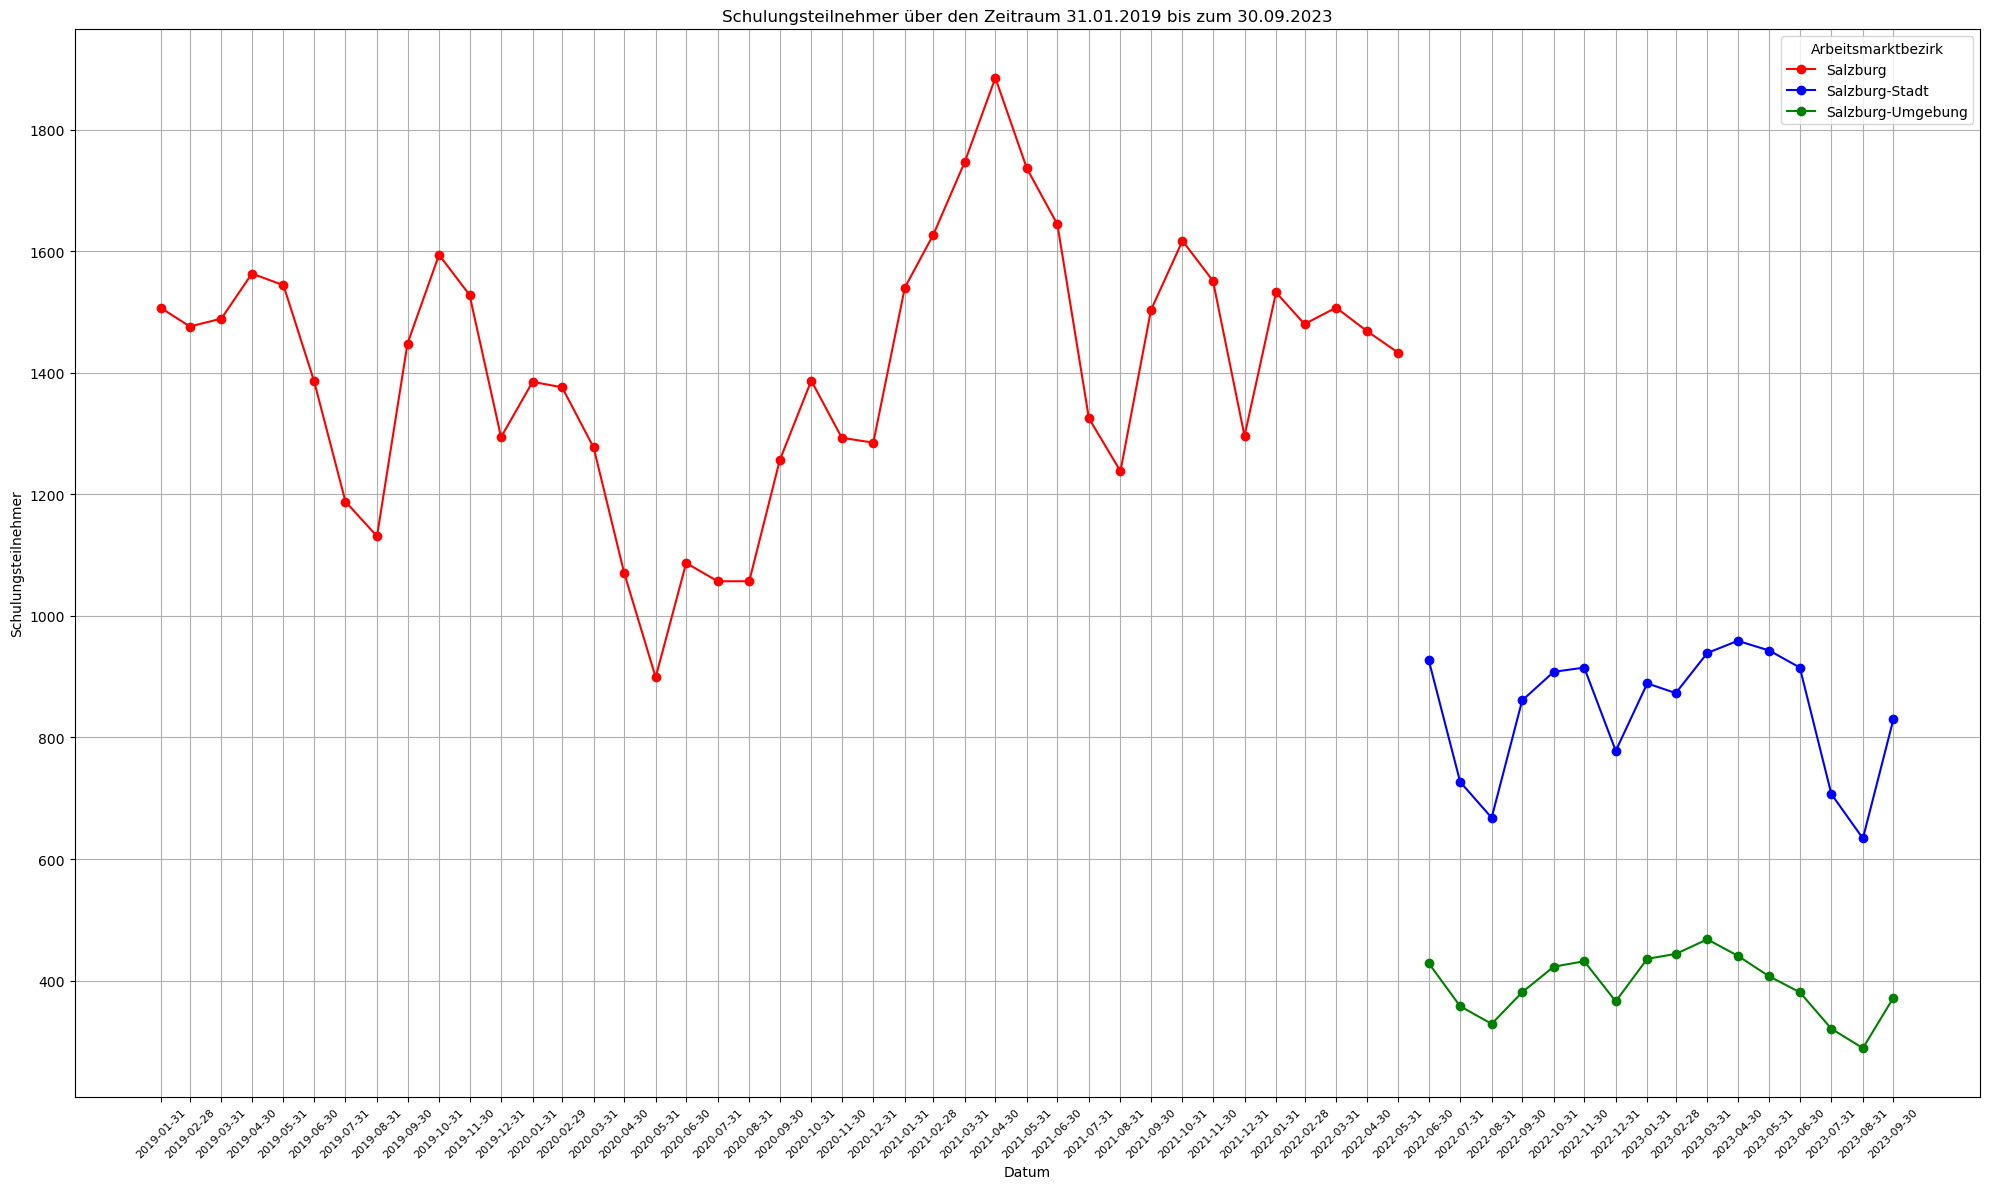

In [37]:
# Schritt 2.1: Plotten des gesamten Bestands von Männern und Frauen über den Zeitraum
df_missing_geometry = df[df['Arbeitsmarktbezirk'].isin(["Salzburg", "Salzburg-Stadt" ,"Salzburg-Umgebung"])]

# Daten vorbereiten
pivot_df_missing_geometry_plot_line = df_missing_geometry.pivot_table(index='Datum', columns='Arbeitsmarktbezirk', values='Bestand', aggfunc='sum')

# Ein einzelnes Plot erstellen (anstatt Subplots)
fig, ax = plt.subplots(figsize=(20, 12))  # Beachten Sie die Änderung hier
colors = ['r','b','g']

for i, column in enumerate(pivot_df_missing_geometry_plot_line.columns):
    ax.plot(pivot_df_missing_geometry_plot_line.index, pivot_df_missing_geometry_plot_line[column], marker='o', linestyle='-', color=colors[i], label=column)

ax.set_title('Schulungsteilnehmer über den Zeitraum 31.01.2019 bis zum 30.09.2023')
ax.set_xlabel('Datum')
ax.set_ylabel('Schulungsteilnehmer')
ax.grid(True)
ax.legend(title='Arbeitsmarktbezirk')
x_ticks = pivot_df_missing_geometry_plot_line.index[::6]  # Verwenden Sie .index hier
ax.set_xticks(pivot_df_missing_geometry_plot_line.index)
ax.tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()

Wir sehen an diesem Plot schön dass die Bestandsaufnahme für den alten Betriebsstandort am 30.04.2022 aufhört und an den zwei neuen Standorten am 31.05.2023 fortgeführt wird

#### 5.1.1 Überprüfung des neuen Dataframes

In [38]:
# Schritt 4: Überprüfen ob der merge irgendwelche noch nicht bekannten NaN / Nullwerte im df verursacht hat
df.isnull().sum()

Datum                        0
Bezirkscode                  0
Arbeitsmarktbezirk           0
ArbeitsmarktbezirkGeo    36574
Geschlecht                   0
Altersgruppe                 0
ObereAltersGrenze            0
BerufsCode                   0
BerufsBez                  506
SubKatCode               20366
SubKatBez                20366
KatCode                  20366
KatBez                   20366
Bestand                      0
dtype: int64

In [39]:
# Schritt 6: Überprüfen welche Arbeitsmarktbezirke von den NaN / Nullwerten Betroffen sind
df_missing_geometry = df[df['ArbeitsmarktbezirkGeo'].isna()]
df_missing_geometry[['Arbeitsmarktbezirk', 'Bezirkscode']].value_counts()

Arbeitsmarktbezirk   Bezirkscode
Wien Jugendliche II  977            14468
Wien Jugendliche I   976            14160
Wien Jugendliche     970             7946
Name: count, dtype: int64

Wie wir oben sehen können gibt es keine Geodaten zu den drei Arbeitsmarktbezirken Wien Jugendliche, Wien Jugendliche I und Wien Jugendliche II. Dies könnte daran liegen dass die Betriebstelle Wien Jugendliche (U25 - Servicestelle) in der Lehrbachgasse 18 in Wien Meidling erst am 18.01.2021 eröffnet wurde.

Das AMS Wien hat seit Jahrzehnten eine spezielle Geschäftsstelle für Jugendliche unter 21 Jahren. Vor einigen Jahren entstand die Idee, die Angebote für Jugendliche und junge Erwachsene zu kombinieren. Das Ergebnis ist das Gemeinschaftsprojekt U25, das am 18. Jänner 2021 eröffnet wurde und als zentrale Anlaufstelle für alle unter 25 in Wien-Meidling dient. U25 funktioniert als "One Stop Shop", bei dem Dienste des AMS Wien, der MA 40 und anderer Partner vereint sind. Das 13.000 Quadratmeter große Zentrum bietet Services rund um Arbeit, Bildung und Soziales für 15- bis 25-Jährige. 

Es wurden zwei Geschäftsstellen des AMS Wien für Jugendliche ins Leben gerufen: 
- [AMS Wien Jugendliche I (U25)](https://www.ams.at/regionen/wien/geschaeftsstellen/ams-wien-jugendliche-1-sfa) - für Arbeitsuchende unter 25 Jahre mit den Geburtsmonaten Jänner bis Juni.
- [AMS Wien Jugendliche II (U25)](https://www.ams.at/regionen/wien/geschaeftsstellen/ams-wien-jugendliche-2-sfa) - für Arbeitsuchende unter 25 Jahre mit den Geburtsmonaten Juli bis Dezember.

Bereits 2019 wurde bekannt gegeben, dass die Stadt Wien und das AMS besser auf die Betreuung von arbeitslosen Menschen unter 25 Jahren abzielen wollen. Der neu entstehende "U25"-Standort auf dem ehemaligen Kapsch-Gelände am Wienerberg soll bis zu 27.000 junge Menschen beraten. Laut Sozialstadtrat Peter Hacker ist das Hauptziel, die Zahl der Jugendlichen und jungen Erwachsenen, die Mindestsicherung beziehen, zu reduzieren. Aktuell sind es in Wien rund 11.000 Personen unter 25 Jahren. Das "U25" wird 350 Mitarbeiter beschäftigen, die eng zusammenarbeiten werden, um sicherzustellen, dass jeder Jugendliche die bestmögliche Bildung und Ausbildung erhält. Petra Draxl, die Chefin von AMS-Wien, betonte, dass die individuelle Betreuung und Beratung der jungen Menschen im Vordergrund stehen wird. Das AMS hatte bereits eine spezielle Geschäftsstelle für junge Menschen, die Altersgrenze lag jedoch bisher bei 21 Jahren. Für das neue Gebäude werden das AMS und die MA 40 monatliche Mietkosten von rund 250.000 Euro tragen [Quelle](https://wien.orf.at/stories/3014113/).

Aus diese Veränderung in den Betriebstellen ist auch in folgenden Plot ersichtlich, da ab dem 31.01.2021 (nach der Eröffnung der neuen Betriebstelle) der Bestand für Wien Jugendliche aufhörte und bei Wien Jugendliche I und II anfing.

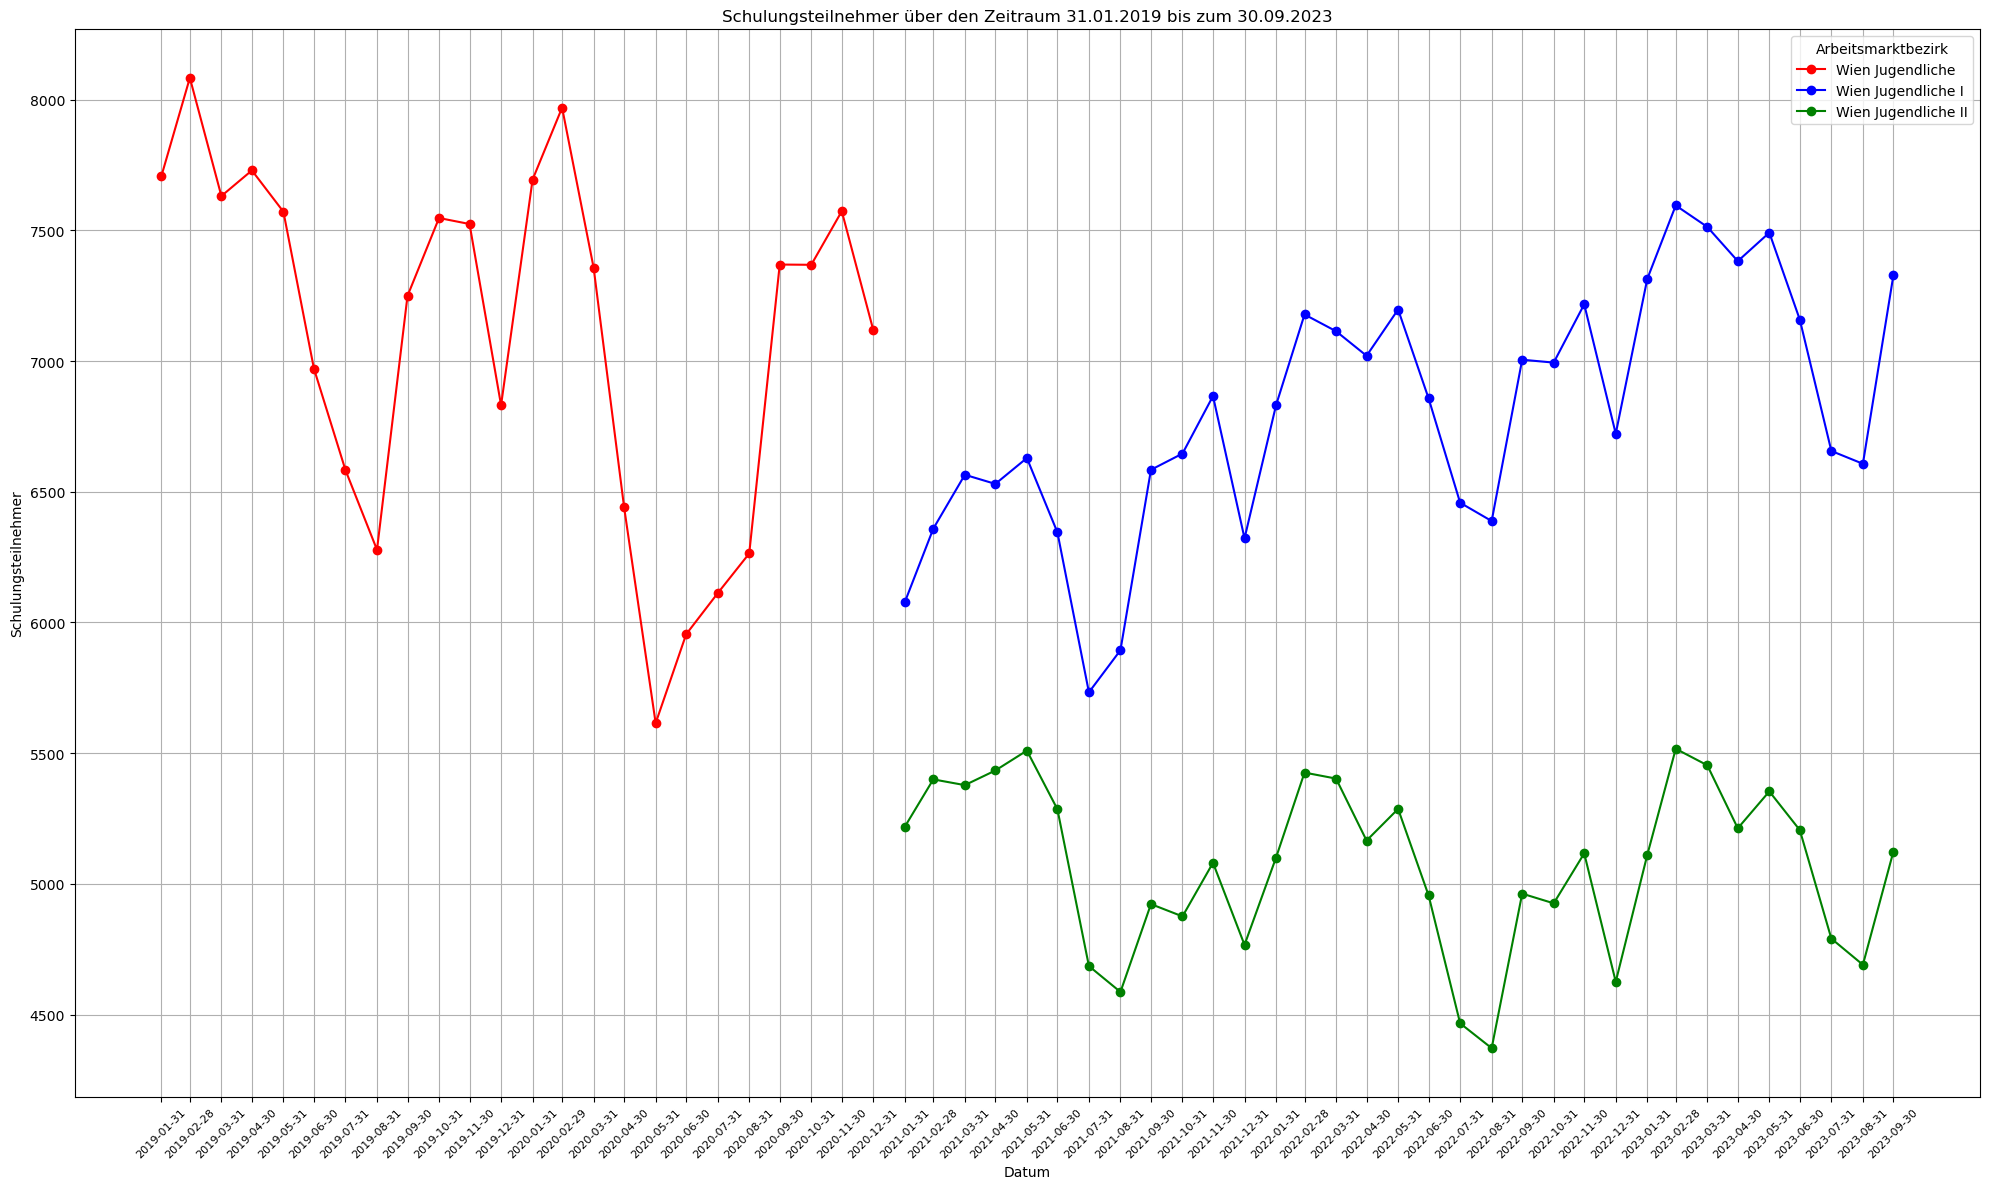

In [40]:
# Schritt 6.1: Plotten des gesamten Bestands von Männern und Frauen über den Zeitraum

# Daten vorbereiten
pivot_df_missing_geometry_plot_line = df_missing_geometry.pivot_table(index='Datum', columns='Arbeitsmarktbezirk', values='Bestand', aggfunc='sum')

# Ein einzelnes Plot erstellen (anstatt Subplots)
fig, ax = plt.subplots(figsize=(20, 12))  # Beachten Sie die Änderung hier
colors = ['r','b','g']

for i, column in enumerate(pivot_df_missing_geometry_plot_line.columns):
    ax.plot(pivot_df_missing_geometry_plot_line.index, pivot_df_missing_geometry_plot_line[column], marker='o', linestyle='-', color=colors[i], label=column)

ax.set_title('Schulungsteilnehmer über den Zeitraum 31.01.2019 bis zum 30.09.2023')
ax.set_xlabel('Datum')
ax.set_ylabel('Schulungsteilnehmer')
ax.grid(True)
ax.legend(title='Arbeitsmarktbezirk')
x_ticks = pivot_df_missing_geometry_plot_line.index[::6]  # Verwenden Sie .index hier
ax.set_xticks(pivot_df_missing_geometry_plot_line.index)
ax.tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()


Ich habe mich dazu entschieden Die unterschiedlichen Arbeitsbezirke in Wien bzgl. der Geodaten als einen zu betrachten und allen Betriebstellen das gleiche Polygpomn (Geodaten zuzuweisen). Hintergrund hierfür ist, dass ich so die Daten nicht verliere und da ich wenn dann eh nur ganz Österreich plotten will auch die Österreich betrachten.
BLabla bla ausformulieren.

In [41]:
# Schritt 7: Polygon Daten vereinfachen
# Alle Arbeitsmarktbezirke mit Wien
wien_bezirke = df[df['Arbeitsmarktbezirk'].str.contains('Wien', case=False)]
# Codes davon
codes = wien_bezirke.groupby("Bezirkscode")["Bestand"].sum()

# Geo-Datensatz filtern nach den Bezirken von Wien
geo = gdf[gdf["id"].isin(codes.index)]
# Einheitspolygon für Wien erstellen
unified_polygon_wien = geo.unary_union

# Löschen Sie alle Einträge für die Wiener Bezirke aus dem Haupt-GDF
gdf = gdf[~gdf["id"].isin(geo["id"])]

# Erstellen Sie einen neuen DataFrame für das vereinigte Polygon
new_data = {"id": 000, "name":"Unified_Wien", "geometry": [unified_polygon_wien]}
new_gdf = gpd.GeoDataFrame(new_data)

# Verwenden Sie concat, um die Daten zusammenzuführen
gdf = pd.concat([gdf, new_gdf], ignore_index=True)

# Aufzählende Nummer hinzufügen
gdf = gdf.reset_index(drop=True)  # Setzen Sie den Index zurück, falls er nicht bereits kontinuierlich ist
gdf['p_id'] = gdf.index + 1 # Beginnen Sie die Zählung bei 1

gdf

c:\ProgramData\Miniconda3\envs\hw3\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as MGI / Austria Lambert (the single non-null crs provided).
  warnings.warn(


,id,name,geometry,p_id
0,101,Eisenstadt,"POLYGON ((644141.140 433837.300, 644140.230 43...",1
1,102,Mattersburg,"POLYGON ((637409.690 427491.130, 637407.440 42...",2
2,103,Neusiedl am See,"POLYGON ((679218.830 437604.050, 679233.320 43...",3
3,104,Oberpullendorf,"POLYGON ((640176.600 395031.750, 640164.650 39...",4
4,105,Oberwart,"POLYGON ((635728.270 364064.690, 635783.010 36...",5
...,...,...,...,...
89,6101,Knittelfeld,"POLYGON ((516537.900 360428.250, 516527.650 36...",90
90,6181,Bad Aussee,"POLYGON ((437112.780 401314.910, 436944.510 40...",91
91,6182,GrÃ¶bming,"POLYGON ((454533.891 386710.707, 454529.744 38...",92
92,8021,Klein-Walsertal,"POLYGON ((163326.120 385540.540, 163338.260 38...",93


In [42]:
# Entfernen der unnötigen Spalten
gdf.drop("name",axis=1, inplace=True)

<Axes: >

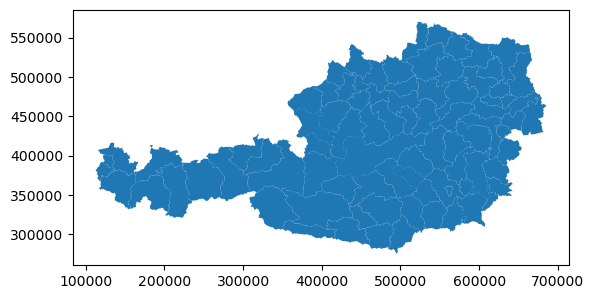

In [43]:
# Erster Probe-Plot
gdf.plot()

Aus Performance Gründen wurde sich dazu entschieden die Spalte ArbeitsmarktbezirkGeo mit durch die neue spalte p_id zu ersetzen. Grund dafür ist dass durch die Größe des dfs und die sich wiederholenden Polygon Werte rechenoperationen unnötig verängern. Das überschreiben der Spalten werte wird über id/Bezirkscodes passieren. Anschließend wird jeder Arbeitsmarktbezirk in wien die p_id des [93, 0, Unified_Wien, POLYGON ((614779.140 473381.620, 614777.820 47...),	94] übergeben. So können zukünftige rechenoperationen ganz einfach ausgeführt werden (Gruopby etc. operationen) anschließend über die p_id das benötigte Polygone angepasst werden, ohne dass ich die Bezirkscodes modifiziert werden müssen

In [44]:
# Entfernen der 'ArbeitsmarktbezirkGeo'-Spalte
df.drop("ArbeitsmarktbezirkGeo", axis=1, inplace=True)

# Hinzufügen der p_id-Spalte zu df basierend auf der Übereinstimmung zwischen 'Bezirkscode' und 'id'
df = df.merge(gdf[['id', 'p_id']], left_on='Bezirkscode', right_on='id', how='left').drop('id', axis=1)

# Identifiziere alle Einträge in df, die Arbeitsmarktbezirke in Wien darstellen
wien_bezirke_mask = df['Arbeitsmarktbezirk'].str.contains('Wien', case=False, na=False)

# Ergänzen der Wien-Werte
df.loc[wien_bezirke_mask, 'p_id'] = 94
df['p_id'] = df['p_id'].astype(int)
df.head(5)

,Datum,Bezirkscode,Arbeitsmarktbezirk,Geschlecht,Altersgruppe,ObereAltersGrenze,BerufsCode,BerufsBez,SubKatCode,SubKatBez,KatCode,KatBez,Bestand,p_id
0,2019-01-31,101,Eisenstadt,Frauen,bis 19 Jahre,20,254,"Tierzuchtgehilf(en)innen, Tierpfleger/innen",2.0,"Ackerbau-, Tierzucht-, Gartenbauberufe",0.0,Land- und forstwirtschaftliche Berufe,1,1
1,2019-01-31,101,Eisenstadt,Frauen,bis 19 Jahre,20,1761,"Maler/innen, Anstreicher/innen",17.0,Bauberufe,1.0,"Produktionsberufe in Bergbau, Industrie und Ge...",1,1
2,2019-01-31,101,Eisenstadt,Frauen,bis 19 Jahre,20,2105,"Karosserie-, Kühlerspengler/innen",21.0,"Spengler/innen, Rohrinstallateur(e)innen, Meta...",2.0,"Produktionsberufe in Bergbau, Industrie und Ge...",1,1
3,2019-01-31,101,Eisenstadt,Frauen,bis 19 Jahre,20,2405,Elektromechaniker/innen,24.0,Elektriker/innen,2.0,"Produktionsberufe in Bergbau, Industrie und Ge...",1,1
4,2019-01-31,101,Eisenstadt,Frauen,bis 19 Jahre,20,3631,Bäcker/innen,36.0,Nahrungs- und Genußmittelhersteller/innen,3.0,"Produktionsberufe in Bergbau, Industrie und Ge...",1,1


In [45]:
# Erneute überprüfen der Dtypes
df.dtypes

Datum                 datetime64[ns]
Bezirkscode                    int64
Arbeitsmarktbezirk            object
Geschlecht                    object
Altersgruppe                  object
ObereAltersGrenze              int64
BerufsCode                     int32
BerufsBez                     object
SubKatCode                   float64
SubKatBez                     object
KatCode                      float64
KatBez                        object
Bestand                        int64
p_id                           int32
dtype: object

## Kapitel 6: Erweiterte Analysen des erweiterten Datensatz

Überprüfen der besten Subkategorien

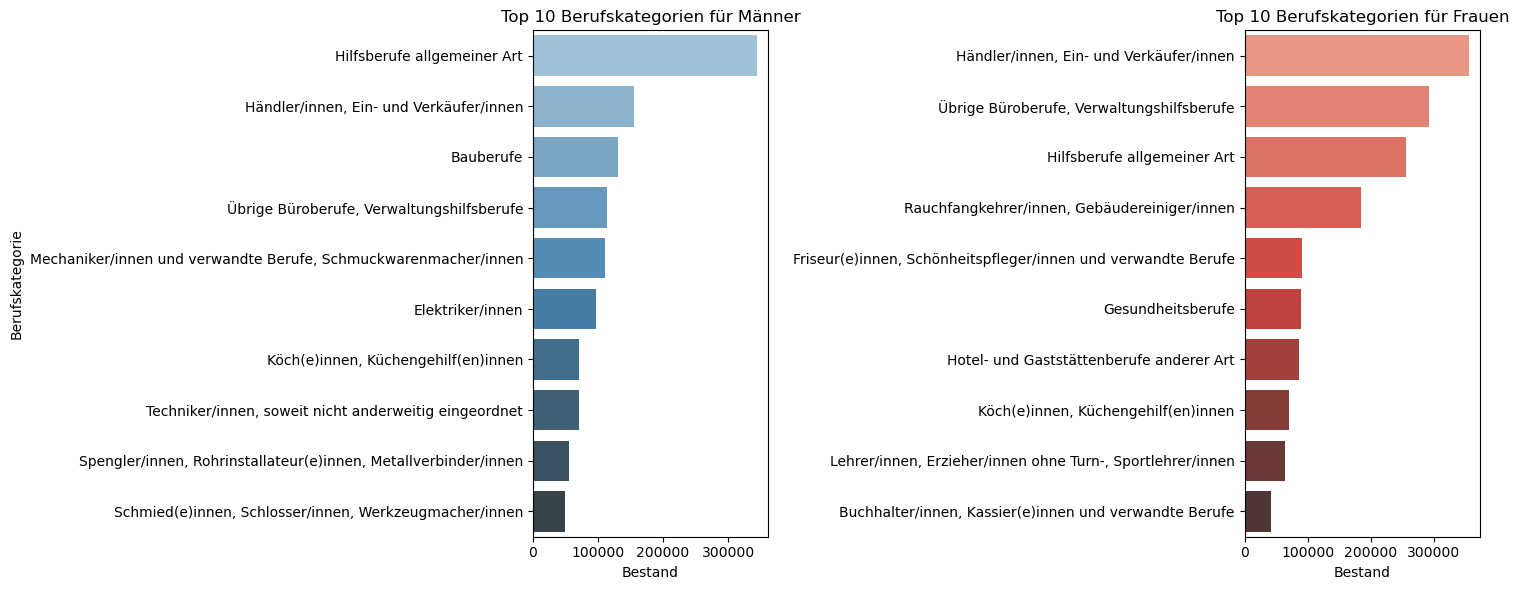

In [46]:
# Überprüfen welche Berufskategorien 2th Ebene die beliebtesten sind

# Teilen Sie den DataFrame in zwei separate DataFrames auf
df_men = df[df['Geschlecht'] == 'Männer']
df_women = df[df['Geschlecht'] == 'Frauen']

# Gruppieren und Summieren des 'Bestand' nach 'KatBez' für beide Geschlechter und nehmen Sie die Top 10
df_grouped_men = df_men.groupby(['SubKatBez'])['Bestand'].sum().sort_values(ascending=False).head(10).reset_index()
df_grouped_women = df_women.groupby(['SubKatBez'])['Bestand'].sum().sort_values(ascending=False).head(10).reset_index()

# Erstellen Sie zwei Seaborn-Barplots in einer Figure für die Top 10 Kategorien
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='Bestand', y='SubKatBez', data=df_grouped_men, ax=ax[0], hue='SubKatBez', dodge=False, palette="Blues_d")
ax[0].set_title('Top 10 Berufskategorien für Männer')
ax[0].set_xlabel('Bestand')
ax[0].set_ylabel('Berufskategorie')

sns.barplot(x='Bestand', y='SubKatBez', data=df_grouped_women, ax=ax[1], hue='SubKatBez', dodge=False, palette="Reds_d")
ax[1].set_title('Top 10 Berufskategorien für Frauen')
ax[1].set_xlabel('Bestand')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()


In [47]:
# Beliebteste BErufskategorie zweiter Ebene mit der ersten Ebene für Männer und Frauen

# Teilen Sie den DataFrame in zwei separate DataFrames auf
df_men = df[df['Geschlecht'] == 'Männer']
df_women = df[df['Geschlecht'] == 'Frauen']

# Gruppieren und Summieren des 'Bestand' nach 'KatBez' und 'SubKatBez' für beide Geschlechter und nehmen Sie die Top 10
top_subkatbez_men = df_men.groupby(['SubKatBez'])['Bestand'].sum().sort_values(ascending=False).head(10).index
df_grouped_men = df_men[df_men['SubKatBez'].isin(top_subkatbez_men)].groupby(['KatBez', 'SubKatBez'])['Bestand'].sum().reset_index()

top_subkatbez_women = df_women.groupby(['SubKatBez'])['Bestand'].sum().sort_values(ascending=False).head(10).index
df_grouped_women = df_women[df_women['SubKatBez'].isin(top_subkatbez_women)].groupby(['KatBez', 'SubKatBez'])['Bestand'].sum().reset_index()

# Erstellen Sie zwei Sunburst-Diagramme
fig_men = px.sunburst(df_grouped_men, path=['KatBez', 'SubKatBez'], values='Bestand', title='Top 10 Subkategorien für Männer',
                      maxdepth=-1, branchvalues='total')
fig_men.update_layout(width=800, height=800)
fig_men.update_traces(textinfo='label+percent parent', insidetextorientation='radial', insidetextfont_size=16)

fig_women = px.sunburst(df_grouped_women, path=['KatBez', 'SubKatBez'], values='Bestand', title='Top 10 Subkategorien für Frauen',
                        maxdepth=-1, branchvalues='total')
fig_women.update_layout(width=800, height=800)
fig_women.update_traces(textinfo='label+percent parent', insidetextorientation='radial', insidetextfont_size=16)

# Anzeigen der Diagramme
fig_men.show()
fig_women.show()


<Axes: xlabel='Datum'>

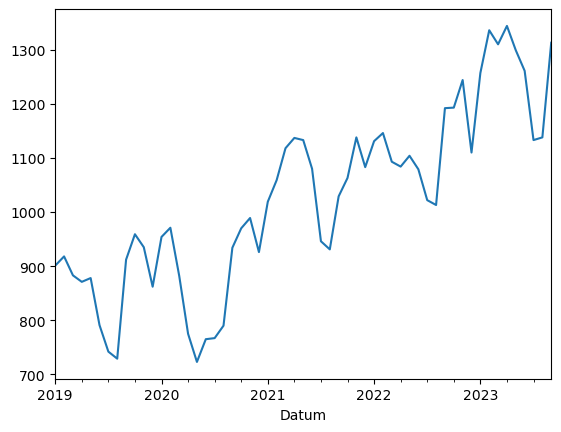

In [48]:
#Überprufen des Wachstums von verschidenen Berufskategorien (Spielerei)
df_men = df[df['Geschlecht'] == 'Frauen']
pi = df_men.pivot_table(index='Datum', columns="KatBez", values='Bestand', aggfunc='sum')
pi["Technische Berufe"].plot()


<Axes: xlabel='Datum'>

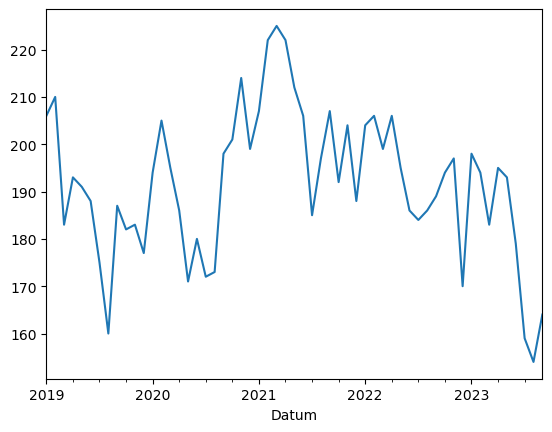

In [49]:
#Überprufen des Wachstums von verschidenen Berufskategorien (Spielerei)
df_men = df[df['Geschlecht'] == 'Frauen']
pi = df_men.pivot_table(index='Datum', columns="SubKatBez", values='Bestand', aggfunc='sum')
pi["Bauberufe"].plot()


## Kapitel 7: Hypothesen

### 7.1 Hypothese 1: Im betrachteten Zeitraum gibt es signifikante Wachstumsunterschiede bei Schulungsteilnehmern verschiedener Berufskategorien (erster Ebene). Erwartet wird ein stärkeres Wachstum bei „Technischen Berufen und „Gesundheits-, Lehr- und Kulturberufen“, während andere Kategorienrückläufig sind.


<b>Annahme:</b> Mit der Zeit gewinnen moderne Berufskategorien, wie die „Technischen Berufe, an
Attraktivität für Schulungsteilnehmer. Auch der Gesundheitssektor sowie Lehr- und Kulturberufe
könnten durch Ereignisse wie die Corona-Pandemie und den steigenden Bedarf in diesen Bereichen
gewachsen sein, während andere Berufskategorien gegensätzliche Trends zeigen könnten.<br>
<b>Methode der Untersuchung:</b> Zu Beginn des Hypothesentests wurden Daten zwischen dem
31. Januar 2019 und dem 30. September 2023 gefiltert und eine Liste der sieben im Datensatz
vertretenen Berufskategorien (erster Ebene) erstellt. Mit Cramérs V wurde der Zusammenhang
in einer Kontingenztafel bewertet. Ein Chi-Quadrat-Test für jede Berufskategorie untersuchte
die Wachstumsraten der Schulungsteilnehmer. Unterschiede im Wachstum wurden durch den
Vergleich des p-Werts des Tests mit einem Schwellenwert von 0,05 bewertet. Die Hypothesen
waren:
H0 (Nullhypothese): Es gibt keinen signifikanten Unterschied im Wachstum der
Schulungsteilnehmer zwischen der betrachteten Berufskategorie und anderen Berufen.
H1 (Alternativhypothese):Es gibt einen signifikanten Unterschied im Wachstum der
Schulungsteilnehmer zwischen der betrachteten Berufskategorie und anderen Berufen.

In [50]:
start_date = df[df['Datum'] == '2019-01-31']
end_date = df[df['Datum'] == '2023-09-30']

liste = ['Land- und forstwirtschaftliche Berufe',
       'Produktionsberufe in Bergbau, Industrie und Gewerbe',
       'Handels- und Verkehrsberufe', 'Dienstleistungsberufe',
       'Mandatar(e)innen, Rechts-, Verwaltungs- und Büroberufe',
       'Technische Berufe', 'Gesundheits-, Lehr- und Kulturberufe']


def cramers_v(chi2, n, k, r):
    """Berechnung von Cramérs V."""
    return np.sqrt(chi2 / (n * min(k-1, r-1)))

start_date = df[df['Datum'] == '2019-01-31']
end_date = df[df['Datum'] == '2023-09-30']

liste = ['Land- und forstwirtschaftliche Berufe',
       'Produktionsberufe in Bergbau, Industrie und Gewerbe',
       'Handels- und Verkehrsberufe', 'Dienstleistungsberufe',
       'Mandatar(e)innen, Rechts-, Verwaltungs- und Büroberufe',
       'Technische Berufe', 'Gesundheits-, Lehr- und Kulturberufe']
results = []

def cramers_v(chi2, n, k, r):
    """Berechnung von Cramérs V."""
    return np.sqrt(chi2 / (n * min(k-1, r-1)))

for l in liste:
    tech_start = start_date[start_date['KatBez'] == l]['Bestand'].sum()
    tech_end = end_date[end_date['KatBez'] == l]['Bestand'].sum()

    others_start = start_date[start_date['KatBez'] != l]['Bestand'].sum()
    others_end = end_date[end_date['KatBez'] != l]['Bestand'].sum()

    # Kontingenztabelle erstellen
    contingency_table = np.array([[tech_start, tech_end],
                                  [others_start, others_end]])

    # chi-quadrat-Test durchführen
    chi2, p, _, _ = chi2_contingency(contingency_table)
    alpha = 0.05
    growth_rate = ((tech_end - tech_start) / tech_start) * 100

    result_dict = {
        'Berufskategorie': l,
        'Wachstumsrate': growth_rate,
        'Chi-Squared Statistic': chi2,
        'p-Wert': p
    }
    
    # Entscheidung, ob H0 oder H1 angenommen wird
    if p <= alpha:
        result_dict['Hypothese'] = 'H1'
    else:
        result_dict['Hypothese'] = 'H0'
    
    # Das Wörterbuch zur Liste hinzufügen
    results.append(result_dict)

# Erstellen Sie einen DataFrame aus der Ergebnisliste
df_results = pd.DataFrame(results)

# Drucken Sie den DataFrame
df_results

,Berufskategorie,Wachstumsrate,Chi-Squared Statistic,p-Wert,Hypothese
0,Land- und forstwirtschaftliche Berufe,5.000000,0.004587,9.460026e-01,H0
1,"Produktionsberufe in Bergbau, Industrie und Ge...",7.169334,5.256582,2.186392e-02,H1
2,Handels- und Verkehrsberufe,-9.386220,151.815804,6.951582e-35,H1
3,Dienstleistungsberufe,7.535897,2.635622,1.044912e-01,H0
4,"Mandatar(e)innen, Rechts-, Verwaltungs- und Bü...",-0.364594,18.004133,2.204258e-05,H1
5,Technische Berufe,26.565590,60.004072,9.466131e-15,H1
6,"Gesundheits-, Lehr- und Kulturberufe",28.886398,134.861349,3.540493e-31,H1


An der oberen Tabelle können wir ablesen für welche Berufkategorie welche Hypothese eingetroffen ist 

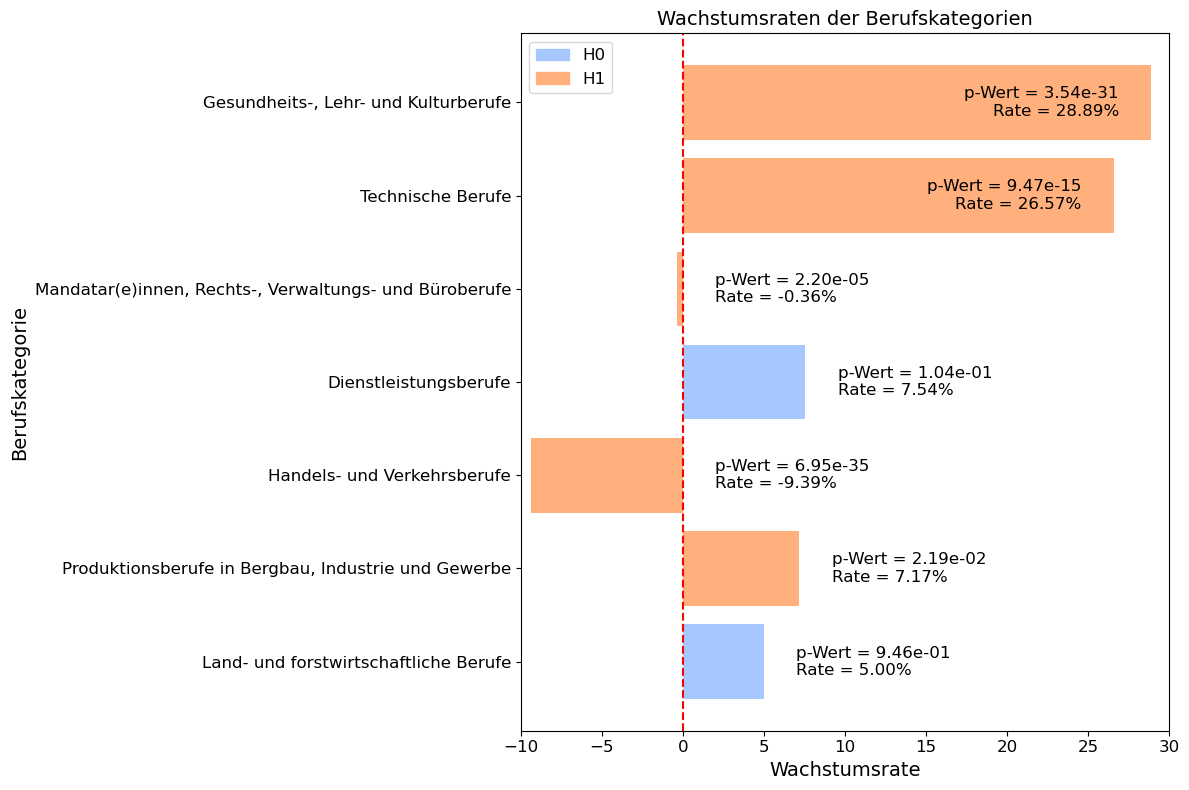

In [51]:
# Visualisiseren des Ergebnisses


colors = ['#a6c8ff' if h == 'H0' else '#ffb07c' for h in df_results['Hypothese']]

# Barplot
plt.figure(figsize=(12, 8))
bars = plt.barh(df_results['Berufskategorie'], df_results['Wachstumsrate'], color=colors)

# P-Werte und Wachstumsrate auf oder neben den Balken anzeigen
for bar, p_val, growth_rate in zip(bars, df_results['p-Wert'], df_results['Wachstumsrate']):
    if growth_rate > 25:
        plt.text(bar.get_width() - 2, bar.get_y() + bar.get_height()/2, 
                 f'p-Wert = {p_val:.2e}\nRate = {growth_rate:.2f}%', ha='right', va='center', color='black', fontsize=12)
    else:
        plt.text(max(bar.get_width(), 0) + 2, bar.get_y() + bar.get_height()/2, 
                 f'p-Wert = {p_val:.2e}\nRate = {growth_rate:.2f}%', ha='left', va='center', color='black', fontsize=12)

# Null-Linie
plt.axvline(0, color='red', linestyle='--')

# Achsentitel, Legende und weitere Einstellungen
plt.ylabel('Berufskategorie')
plt.xlabel('Wachstumsrate')
plt.title('Wachstumsraten der Berufskategorien')
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for color in ['#a6c8ff', '#ffb07c']], 
           labels=['H0', 'H1'], loc='upper left')



# Achsentitel, Legende und weitere Einstellungen
plt.ylabel('Berufskategorie', fontsize=14)
plt.xlabel('Wachstumsrate', fontsize=14)
plt.title('Wachstumsraten der Berufskategorien', fontsize=14)
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for color in ['#a6c8ff', '#ffb07c']], 
           labels=['H0', 'H1'], loc='upper left', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# x-Limits setzen
plt.xlim(-10, 30)

# Anzeigen
plt.tight_layout()
plt.show()

Die Interpretation Ihrer Ergebnisse hängt von Ihrem Forschungskontext und Ihren Zielen ab. Hier ist eine generelle Interpretation der gegebenen Daten:

1. **Signifikanz (p-Wert)**:
   Alle gegebenen Ergebnisse haben einen p-Wert unter 0,05, was bedeutet, dass Sie statistisch signifikante Unterschiede im Wachstum der Schulungsteilnehmer zwischen den spezifizierten Kategorien und anderen Berufen festgestellt haben.

2. **Effektstärke (Cramérs V)**:
   - Cramérs V kann Werte zwischen 0 und 1 annehmen. Werte nahe 0 deuten auf einen schwachen Zusammenhang hin, während Werte nahe 1 auf einen starken Zusammenhang hinweisen.
   - In Ihren Daten variiert Cramérs V zwischen 0,01 und 0,03, was auf einen eher schwachen Zusammenhang hinweist. Auch wenn es statistisch signifikante Unterschiede gibt, ist der tatsächliche Effekt (oder die Stärke des Zusammenhangs) in der Praxis möglicherweise nicht so groß.

3. **Wachstumsrate**:
   - 'Produktionsberufe in Bergbau, Industrie und Gewerbe' zeigen ein positives Wachstum von 7,14%.
   - 'Handels- und Verkehrsberufe' zeigen einen Rückgang von -9,39%.
   - 'Mandatar(e)innen, Rechts-, Verwaltungs- und Büroberufe' haben einen sehr leichten Rückgang von -0,39%.
   - 'Technische Berufe' und 'Gesundheits-, Lehr- und Kulturberufe' haben das höchste Wachstum von 26,57% bzw. 28,85%.

**Zusammenfassung**:

- Die Bereiche 'Technische Berufe' und 'Gesundheits-, Lehr- und Kulturberufe' zeigen das stärkste Wachstum und könnten in der Zukunft eine größere Anzahl von Schulungsteilnehmern haben. Es könnte sinnvoll sein, in diese Bereiche zu investieren, indem man mehr Schulungen oder Ressourcen bereitstellt.
- Die Kategorie 'Handels- und Verkehrsberufe' zeigt einen signifikanten Rückgang. Es könnte wichtig sein, die Gründe für diesen Rückgang zu untersuchen und Strategien zu entwickeln, um ihn umzukehren.
- Obwohl die Effektstärken insgesamt gering sind, zeigen die Wachstumsraten dennoch bedeutende Trends, die in der Planung und Strategieentwicklung berücksichtigt werden sollten.

### 7.2 Hypothese 2 Die Altersgruppe einer Person ist mit ihrer Berufskategorie (zweiter Ebene) korreliert.

<b>Annahme:</b> Einzelne Berufe könnten je nach Altersgruppe unterschiedlich populär sein, beeinflusst durch Trends, Bildungschancen oder andere sozioökonomische Faktoren.<br>
<b>Methode der Untersuchung:</b> Ein Chi-Quadrat-Unabhängigkeitstest wurde durchgeführt, ideal
zur Überprüfung von Beziehungen zwischen kategorialen Variablen. Die betrachteten Variablen
sind hier die Altersgruppen und Berufskategorien der zweiten Ebene. Zeilen mit fehlenden
Werten in “SubKatBez wurden entfernt und eine Kreuztabelle erstellt, die die Summen der
Beobachtungen für jede Kombination ausweist. Der Test prüfte folgende Hypothesen:<br>
H0 (Nullhypothese): Keine Korrelation zwischen Altersgruppe und Berufskategorie.<br>
H1 (Alternativhypothese): Es besteht eine Korrelation zwischen Altersgruppe und
Berufskategorie.

In [52]:
# Hypothesentest:

# Entferne alle Zeilen mit NaN in der Spalte 'SubKatBez'
t = df.dropna(subset=['SubKatBez']).groupby(["Altersgruppe", "SubKatBez"])["Bestand"].sum().reset_index()

# Kreuztabelle erstellen
crosstab = pd.crosstab(t['Altersgruppe'], t['SubKatBez'], values=t["Bestand"], aggfunc='sum')

# Chi-Quadrat-Test durchführen
chi2, p, _, expected = chi2_contingency(crosstab.fillna(0))

# Überprüfen Sie den p-Wert
if p < 0.05:
    # H1 (Alternativhypothese): Es gibt eine Korrelation zwischen der Altersgruppe einer Person und ihrer Berufskategorie.
    print("Die Hypothese wird angenommen: Es gibt eine Korrelation zwischen Altersgruppe und Berufskategorie.")
else:
    # H0 (Nullhypothese): Es gibt keine Korrelation zwischen der Altersgruppe einer Person und ihrer Berufskategorie.
    print("Die Hypothese wird verworfen: Es gibt keine nachweisbare Korrelation zwischen Altersgruppe und Berufskategorie.")
    
# Standardisierte Residuen berechnen
standardized_residuals = (crosstab - expected) / np.sqrt(expected)

# Die 10 stärksten Korrelationen (bzw. die größten Abweichungen) finden
top_correlations = standardized_residuals.stack().reset_index()
top_correlations.columns = ['Altersgruppe', 'SubKatBez', 'Standardized Residual']

top_correlations


Die Hypothese wird angenommen: Es gibt eine Korrelation zwischen Altersgruppe und Berufskategorie.


,Altersgruppe,SubKatBez,Standardized Residual
0,20 bis 24 Jahre,"Ackerbau-, Tierzucht-, Gartenbauberufe",27.473238
1,20 bis 24 Jahre,"Architekt(en)innen, Techniker/innen für Bauwes...",-22.906004
2,20 bis 24 Jahre,Bauberufe,6.918172
3,20 bis 24 Jahre,"Bekleidungshersteller/innen, andere Textilvera...",-18.336338
4,20 bis 24 Jahre,Berufe des religiösen Dienstes,-4.627265
...,...,...,...
726,bis 19 Jahre,"Ziegelmacher/innen, Keramiker/innen",-4.829965
727,bis 19 Jahre,"Übrige Büroberufe, Verwaltungshilfsberufe",-30.379484
728,bis 19 Jahre,Übrige Dienstleistungsberufe,-70.964695
729,bis 19 Jahre,"Übrige Metallwarenmacher/innen, Metalloberfläc...",-39.340594


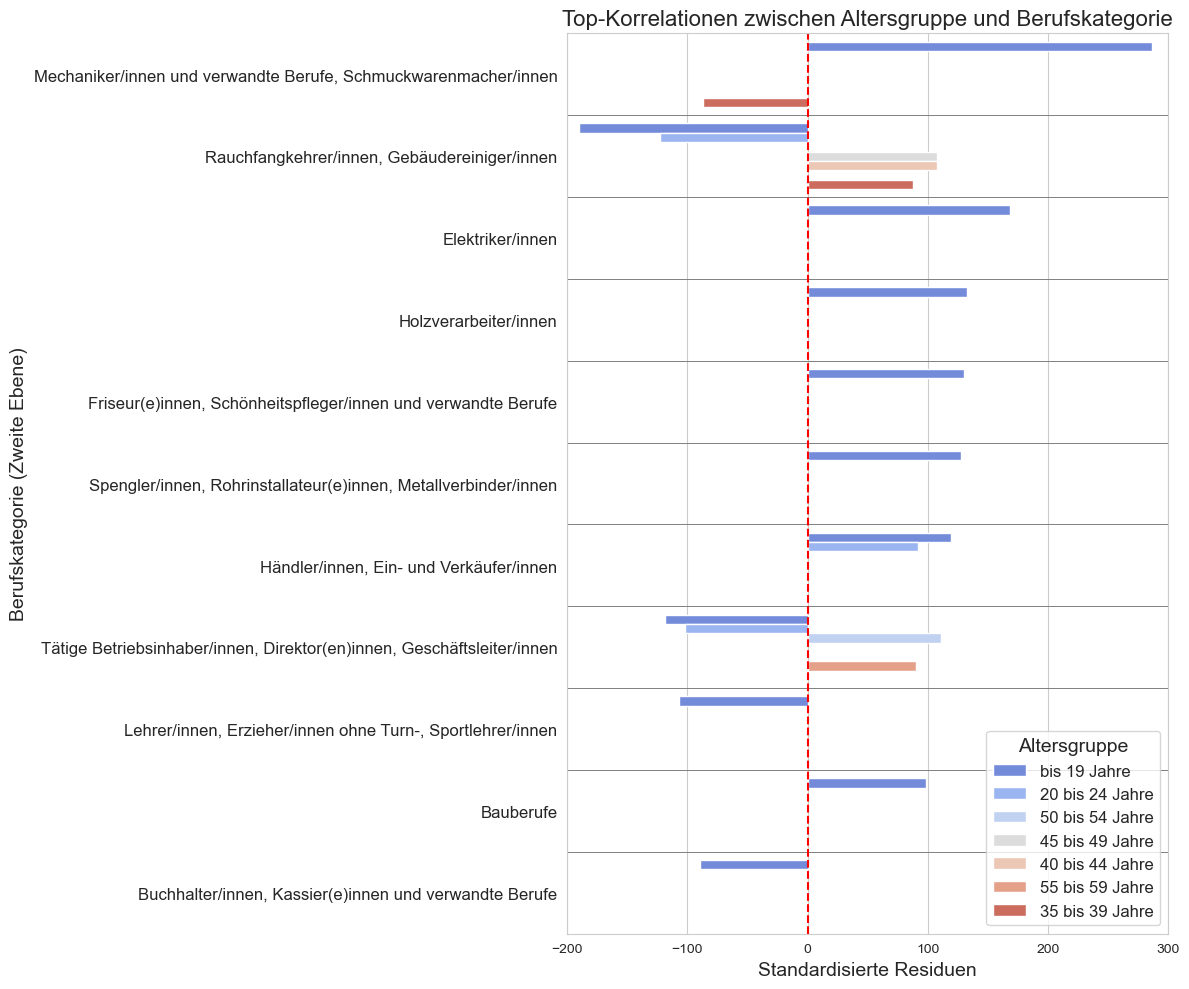

In [53]:
# Visualisiern des Brgebnisses für den Bericht
top_k = 20
sorted_correlations = top_correlations.sort_values(by="Standardized Residual", key=abs, ascending=False).head(top_k)

# Plot-Einstellungen
plt.figure(figsize=(12,10))

# Erstellen Sie einen Barplot
sns.set_style("whitegrid")
barplot = sns.barplot(data=sorted_correlations, y='SubKatBez', x='Standardized Residual', hue='Altersgruppe', dodge=True, palette='coolwarm')

# Titel und Achsenbeschriftungen hinzufügen
plt.title("Top-Korrelationen zwischen Altersgruppe und Berufskategorie", fontsize=16)
plt.xlabel("Standardisierte Residuen", fontsize=14)
plt.ylabel("Berufskategorie (Zweite Ebene)", fontsize=14)
plt.yticks(fontsize=12)

# Legende optimieren
barplot.legend(title="Altersgruppe", title_fontsize='14', loc='lower right', fontsize='12')

# Horizontale Linien hinzufügen
num_of_jobs = sorted_correlations['SubKatBez'].nunique()
plt.axhline(y=-0.5, color='gray', linestyle='-', linewidth=0.7)
for y in range(num_of_jobs):
    plt.axhline(y=y+0.5, color='gray', linestyle='-', linewidth=0.7)

# Vertikale Nulllinie hinzufügen und dicker machen
plt.axvline(x=0, color='r', linestyle='--', linewidth=1.5)

# x-Limits setzen
plt.xlim(-200, 300)

# Plot anzeigen
plt.tight_layout()
plt.show()




Die Rückgabewerte zeigen die standardisierten Residuen für Kombinationen von Altersgruppen und Berufskategorien, die am stärksten von den erwarteten Werten abweichen. Ein hoher positiver standardisierter Residuumswert deutet darauf hin, dass es in dieser Kategorie mehr Personen gibt, als man basierend auf den Marginalhäufigkeiten erwarten würde. Ein negativer Wert würde das Gegenteil anzeigen.

Basierend auf den zurückgegebenen Werten:

- **Jugendliche (bis 19 Jahre)** sind besonders in den Berufskategorien "Mechaniker/innen und verwandte Berufe, Schmuckwarenhersteller/innen", "Elektriker/innen", "Holzverarbeiter/innen", "Friseur(e)innen, Schönheitspfleger/innen und verwandte Berufe", "Spengler/innen, Rohrinstallateur(e)innen, Metallverarbeiter/innen" und "Händler/innen, Ein- und Verkäufer/innen" überrepräsentiert.
  
- **Personen im Alter von 50 bis 54 Jahren** sind besonders in der Berufskategorie "Tätige Betriebsinhaber/innen, Direktor(en)innen und Manager/innen" überrepräsentiert.
  
- **Personen im Alter von 45 bis 49 Jahren und 40 bis 44 Jahren** sind besonders in der Berufskategorie "Rauchfangkehrer/innen, Gebäudereiniger/innen" überrepräsentiert.

Es ist wichtig zu betonen, dass diese Werte nur zeigen, wo die beobachteten Werte am stärksten von den erwarteten Werten abweichen, und nicht unbedingt eine "Korrelation" im traditionellen Sinne zeigen. Das Vorhandensein eines hohen standardisierten Residuums bedeutet, dass etwas Interessantes in diesen spezifischen Kombinationen von Altersgruppen und Berufskategorien vor sich geht, und es könnte nützlich sein, diese Bereiche weiter zu untersuchen, um die zugrundeliegenden Ursachen zu verstehen.

Die Rückgabewerte zeigen die standardisierten Residuen für Kombinationen von Altersgruppen und Berufskategorien, die am stärksten von den erwarteten Werten abweichen. Ein hoher positiver standardisierter Residuumswert deutet darauf hin, dass es in dieser Kategorie mehr Personen gibt, als man basierend auf den Marginalhäufigkeiten erwarten würde. Ein negativer Wert würde das Gegenteil anzeigen.

Basierend auf den zurückgegebenen Werten:

- **Jugendliche (bis 19 Jahre)** sind besonders in den Berufskategorien "Mechaniker/innen und verwandte Berufe, Schmuckwarenhersteller/innen", "Elektriker/innen", "Holzverarbeiter/innen", "Friseur(e)innen, Schönheitspfleger/innen und verwandte Berufe", "Spengler/innen, Rohrinstallateur(e)innen, Metallverarbeiter/innen" und "Händler/innen, Ein- und Verkäufer/innen" überrepräsentiert.
  
- **Personen im Alter von 50 bis 54 Jahren** sind besonders in der Berufskategorie "Tätige Betriebsinhaber/innen, Direktor(en)innen und Manager/innen" überrepräsentiert.
  
- **Personen im Alter von 45 bis 49 Jahren und 40 bis 44 Jahren** sind besonders in der Berufskategorie "Rauchfangkehrer/innen, Gebäudereiniger/innen" überrepräsentiert.

Es ist wichtig zu betonen, dass diese Werte nur zeigen, wo die beobachteten Werte am stärksten von den erwarteten Werten abweichen, und nicht unbedingt eine "Korrelation" im traditionellen Sinne zeigen. Das Vorhandensein eines hohen standardisierten Residuums bedeutet, dass etwas Interessantes in diesen spezifischen Kombinationen von Altersgruppen und Berufskategorien vor sich geht, und es könnte nützlich sein, diese Bereiche weiter zu untersuchen, um die zugrundeliegenden Ursachen zu verstehen.

### 7.3 Hypothese 3

Das Geschlecht der Schulungsteilnehmer ist unabhängig vom Arbeitsmarktbezirk

In [54]:
h3_ = df.groupby(["Arbeitsmarktbezirk","Geschlecht"])["Bestand"].sum()

#Kontingenztabelle erstellen
contingency = pd.crosstab(df["Arbeitsmarktbezirk"], df["Geschlecht"], values=df["Bestand"], aggfunc="sum")

# Chi-Quadrat-Test durchführen
chi2, p, _, expected = chi2_contingency(contingency)

# Ergebnisse ausgeben
print(f"Chi-Quadrat-Statistik: {chi2}")
print(f"p-Wert: {p}")

if p < 0.05:
    print("Ergebnis: Die Nullhypothese (H0) wird verworfen.")
    # Alternativhypothese (H1):
    # Es gibt einen signifikanten Unterschied zwischen den beobachteten 
    # und erwarteten Verteilungen von männlichen und weiblichen Schulungsteilnehmern 
    # über alle Arbeitsmarktbezirke. 
    # Das bedeutet, dass das Geschlecht nicht unabhängig 
    # vom Arbeitsmarktbezirk ist.
else:
    print("Ergebnis: Die Nullhypothese (H0) wird beibehalten.")
    # Nullhypothese (H0):
    # Es gibt keinen signifikanten Unterschied zwischen den beobachteten und erwarteten 
    # Verteilungen von männlichen und weiblichen Schulungsteilnehmern über alle Arbeitsmarktbezirke. 
    # Das bedeutet, dass das Geschlecht unabhängig vom Arbeitsmarktbezirk ist.


Chi-Quadrat-Statistik: 58795.614161863356
p-Wert: 0.0
Ergebnis: Die Nullhypothese (H0) wird verworfen.


In [55]:
contingency['Differenz'] = contingency['Männer'] - contingency['Frauen']
h3_ = df.groupby(["Arbeitsmarktbezirk","p_id"])["Bestand"].sum().reset_index()
# Merge der DataFrames
merged_df = contingency.merge(h3_[['Arbeitsmarktbezirk', 'p_id']], on='Arbeitsmarktbezirk', how='left')

# Gruppieren Sie alle Einträge von Wien
wien = merged_df[merged_df["p_id"]==94].groupby("p_id").sum()
wien['Arbeitsmarktbezirk'] = 'Wien'
wien['p_id'] = 94  # Setze p_id für Wien

# Entfernen Sie alle Einträge von Wien aus dem ursprünglichen DataFrame
merged_df = merged_df[~merged_df['Arbeitsmarktbezirk'].str.contains('Wien', case=False)]

# Verbinden Sie den DataFrame ohne die Wien-Einträge mit dem gruppierten Wien-Eintrag
final_df = pd.concat([merged_df, wien], ignore_index=True)


merged_df = final_df.merge(gdf, on='p_id', how='left').drop(['p_id',"id"], axis=1)
merged_df = gpd.GeoDataFrame(merged_df, geometry='geometry')
merged_df

,Arbeitsmarktbezirk,Frauen,Männer,Differenz,geometry
0,Amstetten,14725,12352,-2373,"POLYGON ((518849.510 461030.120, 518848.780 46..."
1,Baden neu,24630,21478,-3152,"POLYGON ((630860.670 450177.320, 630846.730 45..."
2,Bischofshofen,11885,7134,-4751,"POLYGON ((392920.380 352441.750, 393010.250 35..."
3,Bludenz,10196,7846,-2350,"POLYGON ((158753.180 347618.770, 158726.610 34..."
4,Braunau,22976,15375,-7601,"POLYGON ((366983.126 454718.269, 366975.130 45..."
...,...,...,...,...,...
83,Wolfsberg,8946,6594,-2352,"POLYGON ((522163.950 306640.910, 522136.170 30..."
84,Wr. Neustadt,26540,23383,-3157,"POLYGON ((614108.800 395335.100, 614105.540 39..."
85,Zell am See,7981,5238,-2743,"POLYGON ((315825.740 379673.350, 315846.140 37..."
86,Zwettl,4204,2879,-1325,"POLYGON ((533938.880 495500.320, 533914.280 49..."


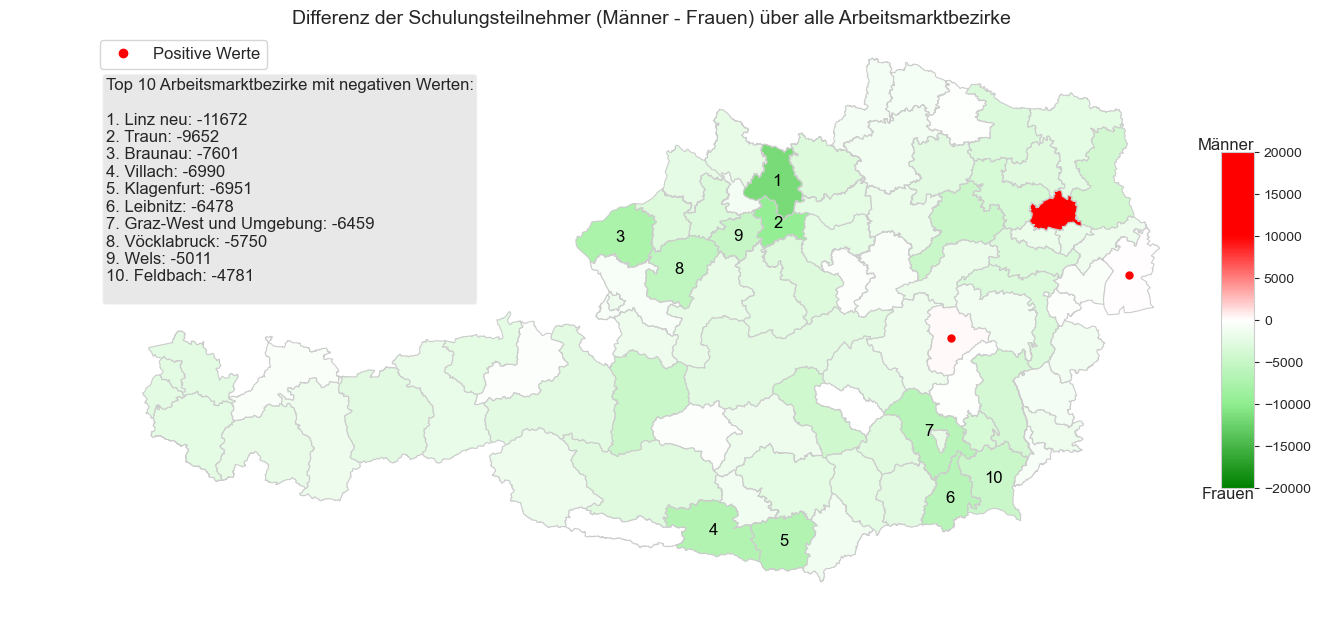

In [56]:
# Visualisiseren der Ergebnisse:
# Anpassung des Farbverlaufs
cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom", 
    ["green", "lightgreen", "white", "red", "red"], 
    N=256
)
norm = mcolors.TwoSlopeNorm(vmin=-20000, vcenter=0, vmax=20000)

# Karte plotten
fig, ax = plt.subplots(figsize=(15, 10))
merged_df.plot(column='Differenz', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', norm=norm)

# Titel setzen
plt.title('Differenz der Schulungsteilnehmer (Männer - Frauen) über alle Arbeitsmarktbezirke', fontsize=14)

# Gitter und Achsenticks entfernen
ax.axis("off")

# Listen für die Top 10 Arbeitsbezirke mit negativen Werten und für Arbeitsbezirke mit positiven Werten erstellen
top10_negative = merged_df.nsmallest(10, 'Differenz')
positive_values = merged_df[merged_df['Differenz'] > 0]

# Rangzahlen für die Top 10 Arbeitsbezirke mit negativen Werten zeichnen
for i, (x, y) in enumerate(zip(top10_negative.geometry.centroid.x, top10_negative.geometry.centroid.y), start=1):
    ax.text(x, y, str(i), color='black', fontsize=12, ha='center', va='center')

# Zeichne rote Punkte für Arbeitsbezirke mit positiven Werten
for x, y in zip(positive_values.geometry.centroid.x, positive_values.geometry.centroid.y):
    ax.scatter(x, y, color='red', marker='o', s=25)

# Legende hinzufügen
red_dot = Line2D([0], [0], color='red', marker='o', linestyle='None', label='Positive Werte')
leg = ax.legend(handles=[red_dot], loc='upper left', fontsize=12)

# Farblegende hinzufügen
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1, aspect=10)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cbar = fig.colorbar(sm, cax=cax)

# Beschriftung zur Legende hinzufügen
cax.text(1, 1.02, 'Männer', fontsize=12, va='center', ha='right', transform=cax.transAxes)
cax.text(1, -0.02, 'Frauen', fontsize=12, va='center', ha='right', transform=cax.transAxes)

# Auflistung der Top 10 Arbeitsmarktbezirke mit negativen Werten
text_str = "Top 10 Arbeitsmarktbezirke mit negativen Werten:\n\n"
i = 1
for index, row in top10_negative.iterrows():
    text_str += f"{i}. {row['Arbeitsmarktbezirk']}: {row['Differenz']}\n"
    i = i + 1

# Textfeld hinzufügen, positioniert relativ zur Legende
leg_bbox = leg.get_window_extent()
x_position = leg_bbox.x0 / fig.dpi - 0.9
y_position = (leg_bbox.y0 / fig.dpi) - 2.17
props = dict(boxstyle='round, pad=0.2', facecolor='lightgray', alpha=0.5)
ax.text(x_position, y_position, text_str, transform=fig.dpi_scale_trans, fontsize=12,
        verticalalignment='top', bbox=props)

plt.show()


## Quellen
Ein paar Informationsquellen, die für die Arbeit am Projekt genutzt wurden.

[1] https://www.data.gv.at/katalog/dataset/CFE2FF7E9AD53C1EE053C630070AB113#additional-info<br>
Infos AMS:
https://www.ams.at/organisation/ueber-ams/daten-und-fakten#:~:text=Das%20Arbeitsmarktservice%20%2D%20kurz%20AMS%20%2D%20ist,Information%2C%20Qualifizierung%20und%20finanzielle%20F%C3%B6rderung.<br>
Infos RGS: https://www.cbs.nl/en-gb/participants-survey/businesses/faq-e/rgs-en/en-rgs/what-is-rgs-#:~:text=RGS%20is%20a%20nationally%20agreed,needs%20to%20compile%20its%20statistics.<br>
Rentenalter Österreich: https://www.sozialministerium.at/Services/Leichter-Lesen/Soziales/Pensionsarten/Alterspension.html#:~:text=die%20Pensions%2DVersicherungsanstalt.-,Das%20gesetzliche%20Pensions%2DAntrittsalter,60%20Jahren%20in%20Pension%20gehen.<br>
Quelle das Schulungen mehr als immer nur ein Monat gehen:<br>
1. https://www.ams.at/arbeitsuchende/frauen/wiedereinstieg-mit-zukunft#:~:text=dauert%20der%20Kurs%3F-,Wie%20lange%20dauert%20der%20Kurs%3F,durchschnittlich%2020%20Stunden%20pro%20Woche.<br>
2. https://www.ams.at/arbeitsuchende/aus-und-weiterbildung/so-foerdern-wir-ihre-aus--und-weiterbildung-/unternehmensgruendungs-programm<br>

Wien Jugendliche 1: https://www.ams.at/regionen/wien/geschaeftsstellen/ams-wien-jugendliche-1-sfa<br>
Wien Jugendliche 2: https://www.ams.at/regionen/wien/geschaeftsstellen/ams-wien-jugendliche-2-sfa<br>
Entstehungsgeschichte Wien Jugendliche (Jugendlich 1+2 wurden am 18.01.2021 ins leben gerufen Davor waren es über die Stadt verteilte anlaufstellen und dann wurden das U25 AMS als riesen anlaufstelle geöffnet): https://www.ams.at/arbeitsuchende/u25/historie<br>
Geschicht WIen Jugend: https://wien.orf.at/stories/3014113/<br>

Salzburg Betriebsstelle (Teilung in 2022): https://www.ams.at/regionen/salzburg/geschaeftsstellen/ams-salzburg<br>
Schulungen:  https://www.ams.at/arbeitsmarktdaten-und-medien/arbeitsmarkt-daten-und-arbeitsmarkt-forschung/fachbegriffe#inschulungbefindlichepersonen
